## Mini Project Rakamin Academy <br>

## Mini Project Predict Clicked Ads Customer Classification by using Machine Learning
## Create By  : Mohd Fauzan Heryka Putra 

---- 

# Project Outline : 
- Overview 
- Goal
- Objective
- Import Library
- Load Dataset 
- Data Exploration
- EDA
- Data Preprocessing
- Modeling 
- Business Recomendation
- Business Simulation

## Background
A company in Indonesia wants to know the effectiveness of an advertisement that they display. It is important for the company to be able to find out how much the advertisement has been marketed so that it can attract customers to see the advertisement.By processing historical advertisement data and finding insights and patterns that occur, it can help companies determine marketing targets. The focus of this case is to create a machine learning classification model that functions to determine the right target customers.

## Problem
The business team wants to optimize their advertising methods on digital platforms in order to get potential users to click on a product so that the costs to be incurred are not too large.

## Goal
Make target marketing effective by using machine learning so that it can increase the click-through rate (CTR) and reduce costs incurred.

## Objective
Building supervised machine learning to classify the right customers for marketing targets

## Business Metrics
Click Through Rate (CTR) <br>
Profit


In [1]:
# library dataset &visual data
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
%matplotlib inline
import sweetviz as sv
#from dataprep.datasets import load_dataset
#from dataprep.eda import create_report
import time

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
# modeling
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import GradientBoostingClassifier
import scikitplot as skplt

# eval metrics model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# add on
from IPython.display import Image 
import pickle
import datetime
import warnings
warnings.filterwarnings('ignore')
#sns.set(rc={'figure.figsize':(16,8)})
#sns.set_style("darkgrid")
#sns.color_palette("dark")
plt.style.use("fivethirtyeight")

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Exploration

In [2]:
df = pd.read_csv("Clicked Ads Dataset.csv")
df

Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
0             0                     68.95   35  432837300.0   
1             1                     80.23   31  479092950.0   
2             2                     69.47   26  418501580.0   
3             3                     74.15   29  383643260.0   
4             4                     68.37   35  517229930.0   
..          ...                       ...  ...          ...   
995         995                     72.97   30  499691990.0   
996         996                     51.30   45  474475190.0   
997         997                       NaN   51  296910040.0   
998         998                     55.55   19  293445530.0   
999         999                     45.01   26  209130600.0   

     Daily Internet Usage       Male        Timestamp Clicked on Ad  \
0                  256.09  Perempuan   3/27/2016 0:53            No   
1                  193.77  Laki-Laki    4/4/2016 1:39            No   
2                  236.50  Perempuan  3/13/2016 20:35            No   
3                  245.89  Laki-Laki   1/10/2016 2:31            No   
4                  225.58  Perempuan    6/3/2016 3:36            No   
..                    ...        ...              ...           ...   
995                208.58  Laki-Laki  2/11/2016 21:49           Yes   
996                134.42  Laki-Laki   4/22/2016 2:07           Yes   
997                120.37  Laki-Laki   2/1/2016 17:24           Yes   
998                187.95  Perempuan   3/24/2016 2:35            No   
999                178.35  Perempuan   6/3/2016 21:43           Yes   

              city                       province    category  
0    Jakarta Timur  Daerah Khusus Ibukota Jakarta   Furniture  
1         Denpasar                           Bali        Food  
2         Surabaya                     Jawa Timur  Electronic  
3            Batam                 Kepulauan Riau       House  
4            Medan                  Sumatra Utara     Finance  
..             ...                            ...         ...  
995       Semarang                    Jawa Tengah     Finance  
996      Pakanbaru                           Riau  Electronic  
997      Samarinda               Kalimantan Timur      Travel  
998      Tangerang                         Banten        Bank  
999         Serang                         Banten      Travel  

[1000 rows x 11 columns]

Computing series-max-agg-13e14eb936b4bd1da5f213eefa6488a1:   0%|          | 0/1518 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
Computing series-sum-chunk-9cbfd09c938d0c30090f15beb79ad35b-d61e7775c3eedd014974da0c40b405d4:  34%|███▍      | 514/1518 [00:00<00:00, 1740.55it/s]/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1606: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1808: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)
/usr/local/lib/python3.10/dist-packages/scipy

DataPrep Report
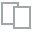
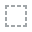
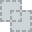
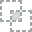
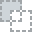
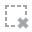
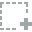
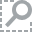
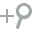
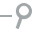
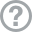
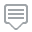
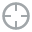
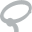
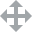
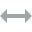
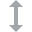
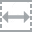
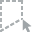
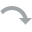
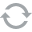
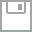
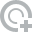
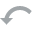
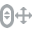
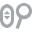
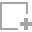
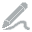
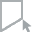
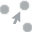
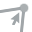
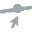

In [12]:

create_report(df)

In [28]:
pd.set_option('display.max_colwidth',1)
# data uniq di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col,round(df[col].isnull().sum()/len(df[col]) *100,2),df[col].dtype,df[col].nunique(), df[col].unique()])

overview = pd.DataFrame(columns=['Column Name','Missing Percentage(%)','Data Type' ,'Number of Unique', 'Unique Sample'],
                     data=listItem)
overview

Column Name  Missing Percentage(%) Data Type  \
0   Unnamed: 0                0.0                    int64      
1   Daily Time Spent on Site  1.3                    float64    
2   Age                       0.0                    int64      
3   Area Income               1.3                    float64    
4   Daily Internet Usage      1.1                    float64    
5   Male                      0.3                    object     
6   Timestamp                 0.0                    object     
7   Clicked on Ad             0.0                    object     
8   city                      0.0                    object     
9   province                  0.0                    object     
10  category                  0.0                    object     

    Number of Unique  \
0   1000               
1   890                
2   43                 
3   987                
4   955                
5   2                  
6   997                
7   2                  
8   30                 
9   16                 
10  10                 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Unique Sample  
0   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [5]:

display(round(df.describe()), df.describe(include= "object").T)

Unnamed: 0  Daily Time Spent on Site     Age  Area Income  \
count      1000.0                     987.0  1000.0        987.0   
mean        500.0                      65.0    36.0  384864671.0   
std         289.0                      16.0     9.0   94079990.0   
min           0.0                      33.0    19.0   97975500.0   
25%         250.0                      51.0    29.0  328632990.0   
50%         500.0                      68.0    35.0  399068320.0   
75%         749.0                      78.0    42.0  458355450.0   
max         999.0                      91.0    61.0  556393600.0   

       Daily Internet Usage  
count                 989.0  
mean                  180.0  
std                    44.0  
min                   105.0  
25%                   139.0  
50%                   183.0  
75%                   219.0  
max                   267.0

count unique                            top freq
Male            997      2                      Perempuan  518
Timestamp      1000    997                5/26/2016 15:40    2
Clicked on Ad  1000      2                             No  500
city           1000     30                       Surabaya   64
province       1000     16  Daerah Khusus Ibukota Jakarta  253
category       1000     10                       Otomotif  112

## Insight 
- Overall this dataset has 1000 rows and 11 variables
- Missing values found were only around 0.4% in the `income`, `daily time spent`, `daily internet usage`, `male` columns
- no duplicated data
- an incorrect data type was found in the `timestamp` column which should have a datetime
- all numerical features do not seem to have outliers, so we will validate further later
- the male column should be replaced with gender

## Descriptive analysis
- some columns such as `age`, `income` have a distribution that is close to normal, then columns such as `daily time spent`, `daily internet usage` have a bimodal tendency
- The average user spends `daily time spent on site` which is 65 minutes with a minimum of 33 minutes / day
- for user ages ranging from 19 - 61 years, with the average user who surfs the web most often being 36 years
- The average user only uses the internet for 180 minutes (3 hours)

In [3]:
#drop unnecessary columns
df.drop('Unnamed: 0', axis=1, inplace=True)


## lower case all columns
for i in df.columns:
    lower = i.lower()  
    df.rename(columns={i: lower}, inplace=True)
   
for i in df.columns: 
    space = i.replace(" ", "_")  
    df.rename(columns={i : space}, inplace=True)

# rename column male to gender
df.rename(columns= {"male" : "gender"}, inplace= True)
df.columns

Index(['daily_time_spent_on_site', 'age', 'area_income',
       'daily_internet_usage', 'gender', 'timestamp', 'clicked_on_ad', 'city',
       'province', 'category'],
      dtype='object')

In [4]:
df["timestamp"] = pd.to_datetime(df.timestamp)

### Univariate analysis

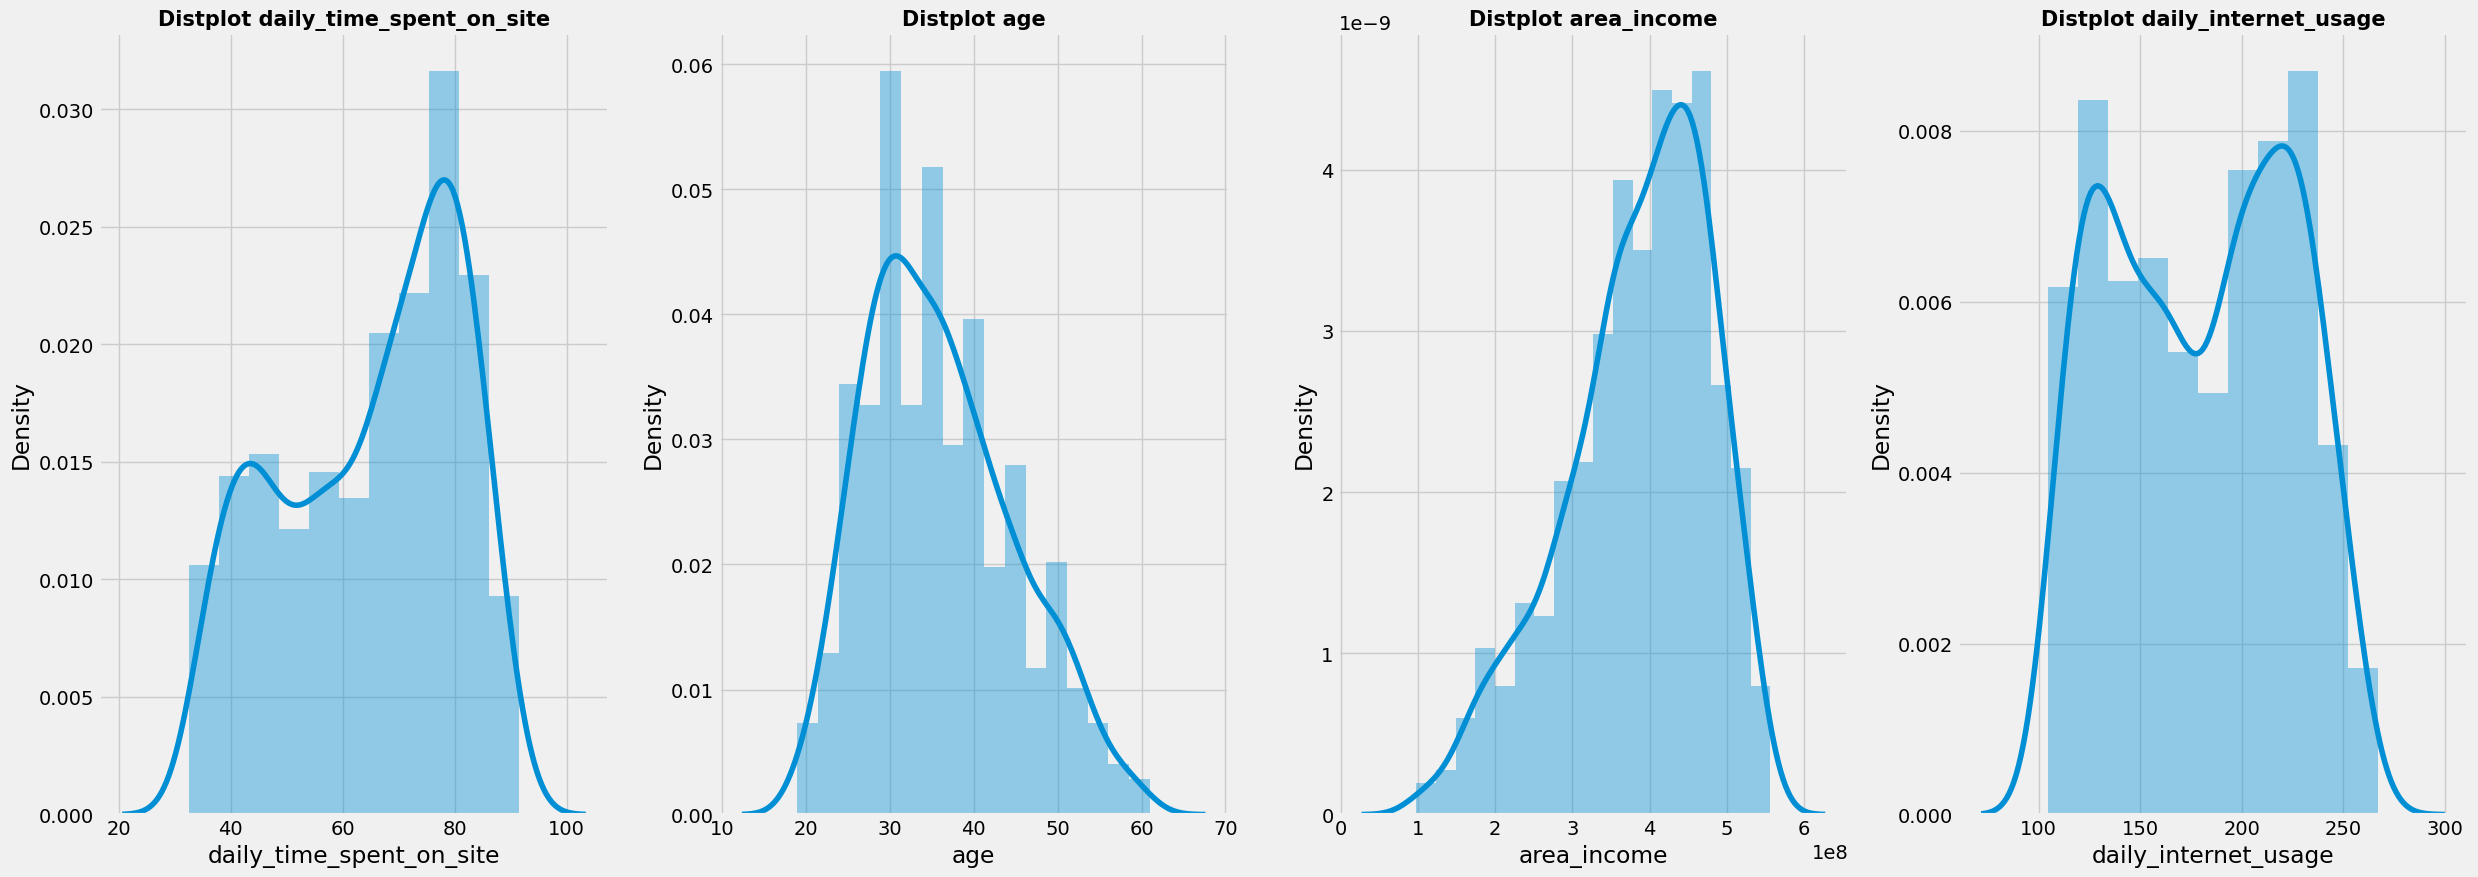

In [5]:
# check numerical distribution
num = list(df.select_dtypes(["float64", "int64"]))
plt.figure(figsize=(25, 9))
for i in range(0, len(num)):
    plt.subplot(math.ceil(len(num)/4),4, i+1)
    sns.distplot(df[num[i]])
    plt.title('Distplot {}'.format(num[i]), fontsize=15, fontweight='bold')
    plt.tight_layout()

In [54]:
for i in range(0, len(num)):
    print(f"Skewness {df[num].columns[i]} : {df[num[i]].skew()}")

Skewness daily_time_spent_on_site : -0.36975576201210597
Skewness age : 0.4791416884125751
Skewness area_income : -0.6443017726963709
Skewness daily_internet_usage : -0.03139523418033974


It has been confirmed that the distribution of numerical features is bimodal and almost normal, soo let's validate outlier 

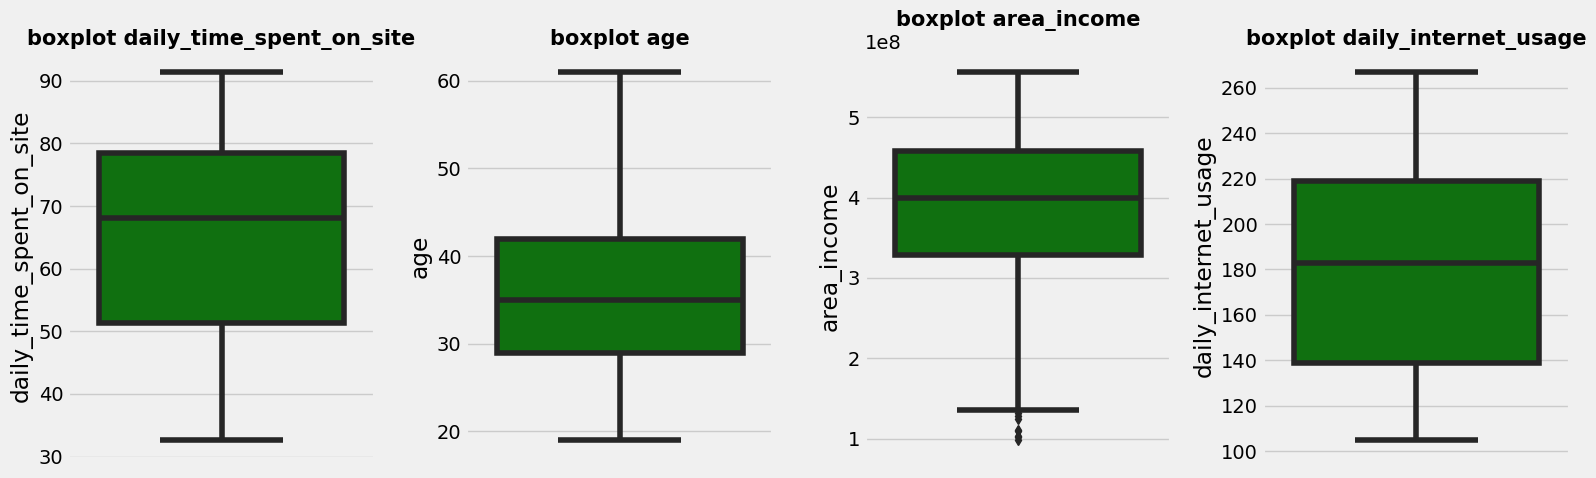

In [14]:
# check outlier 
plt.figure(figsize=(20,5))
for i in range(0, len(num)):
    plt.subplot(math.ceil(len(num)/5), 5 , i+1)
    sns.boxplot(y=df[num[i]], color='g', orient= "v")
    plt.title("boxplot {}".format(num[i]), fontsize=15, fontweight='bold')
    plt.tight_layout()

It can be seen that there are no extreme outliers, in the income feature there are visible outliers but if you look at the QQ plot in DataPrep it is still a collective outlier.

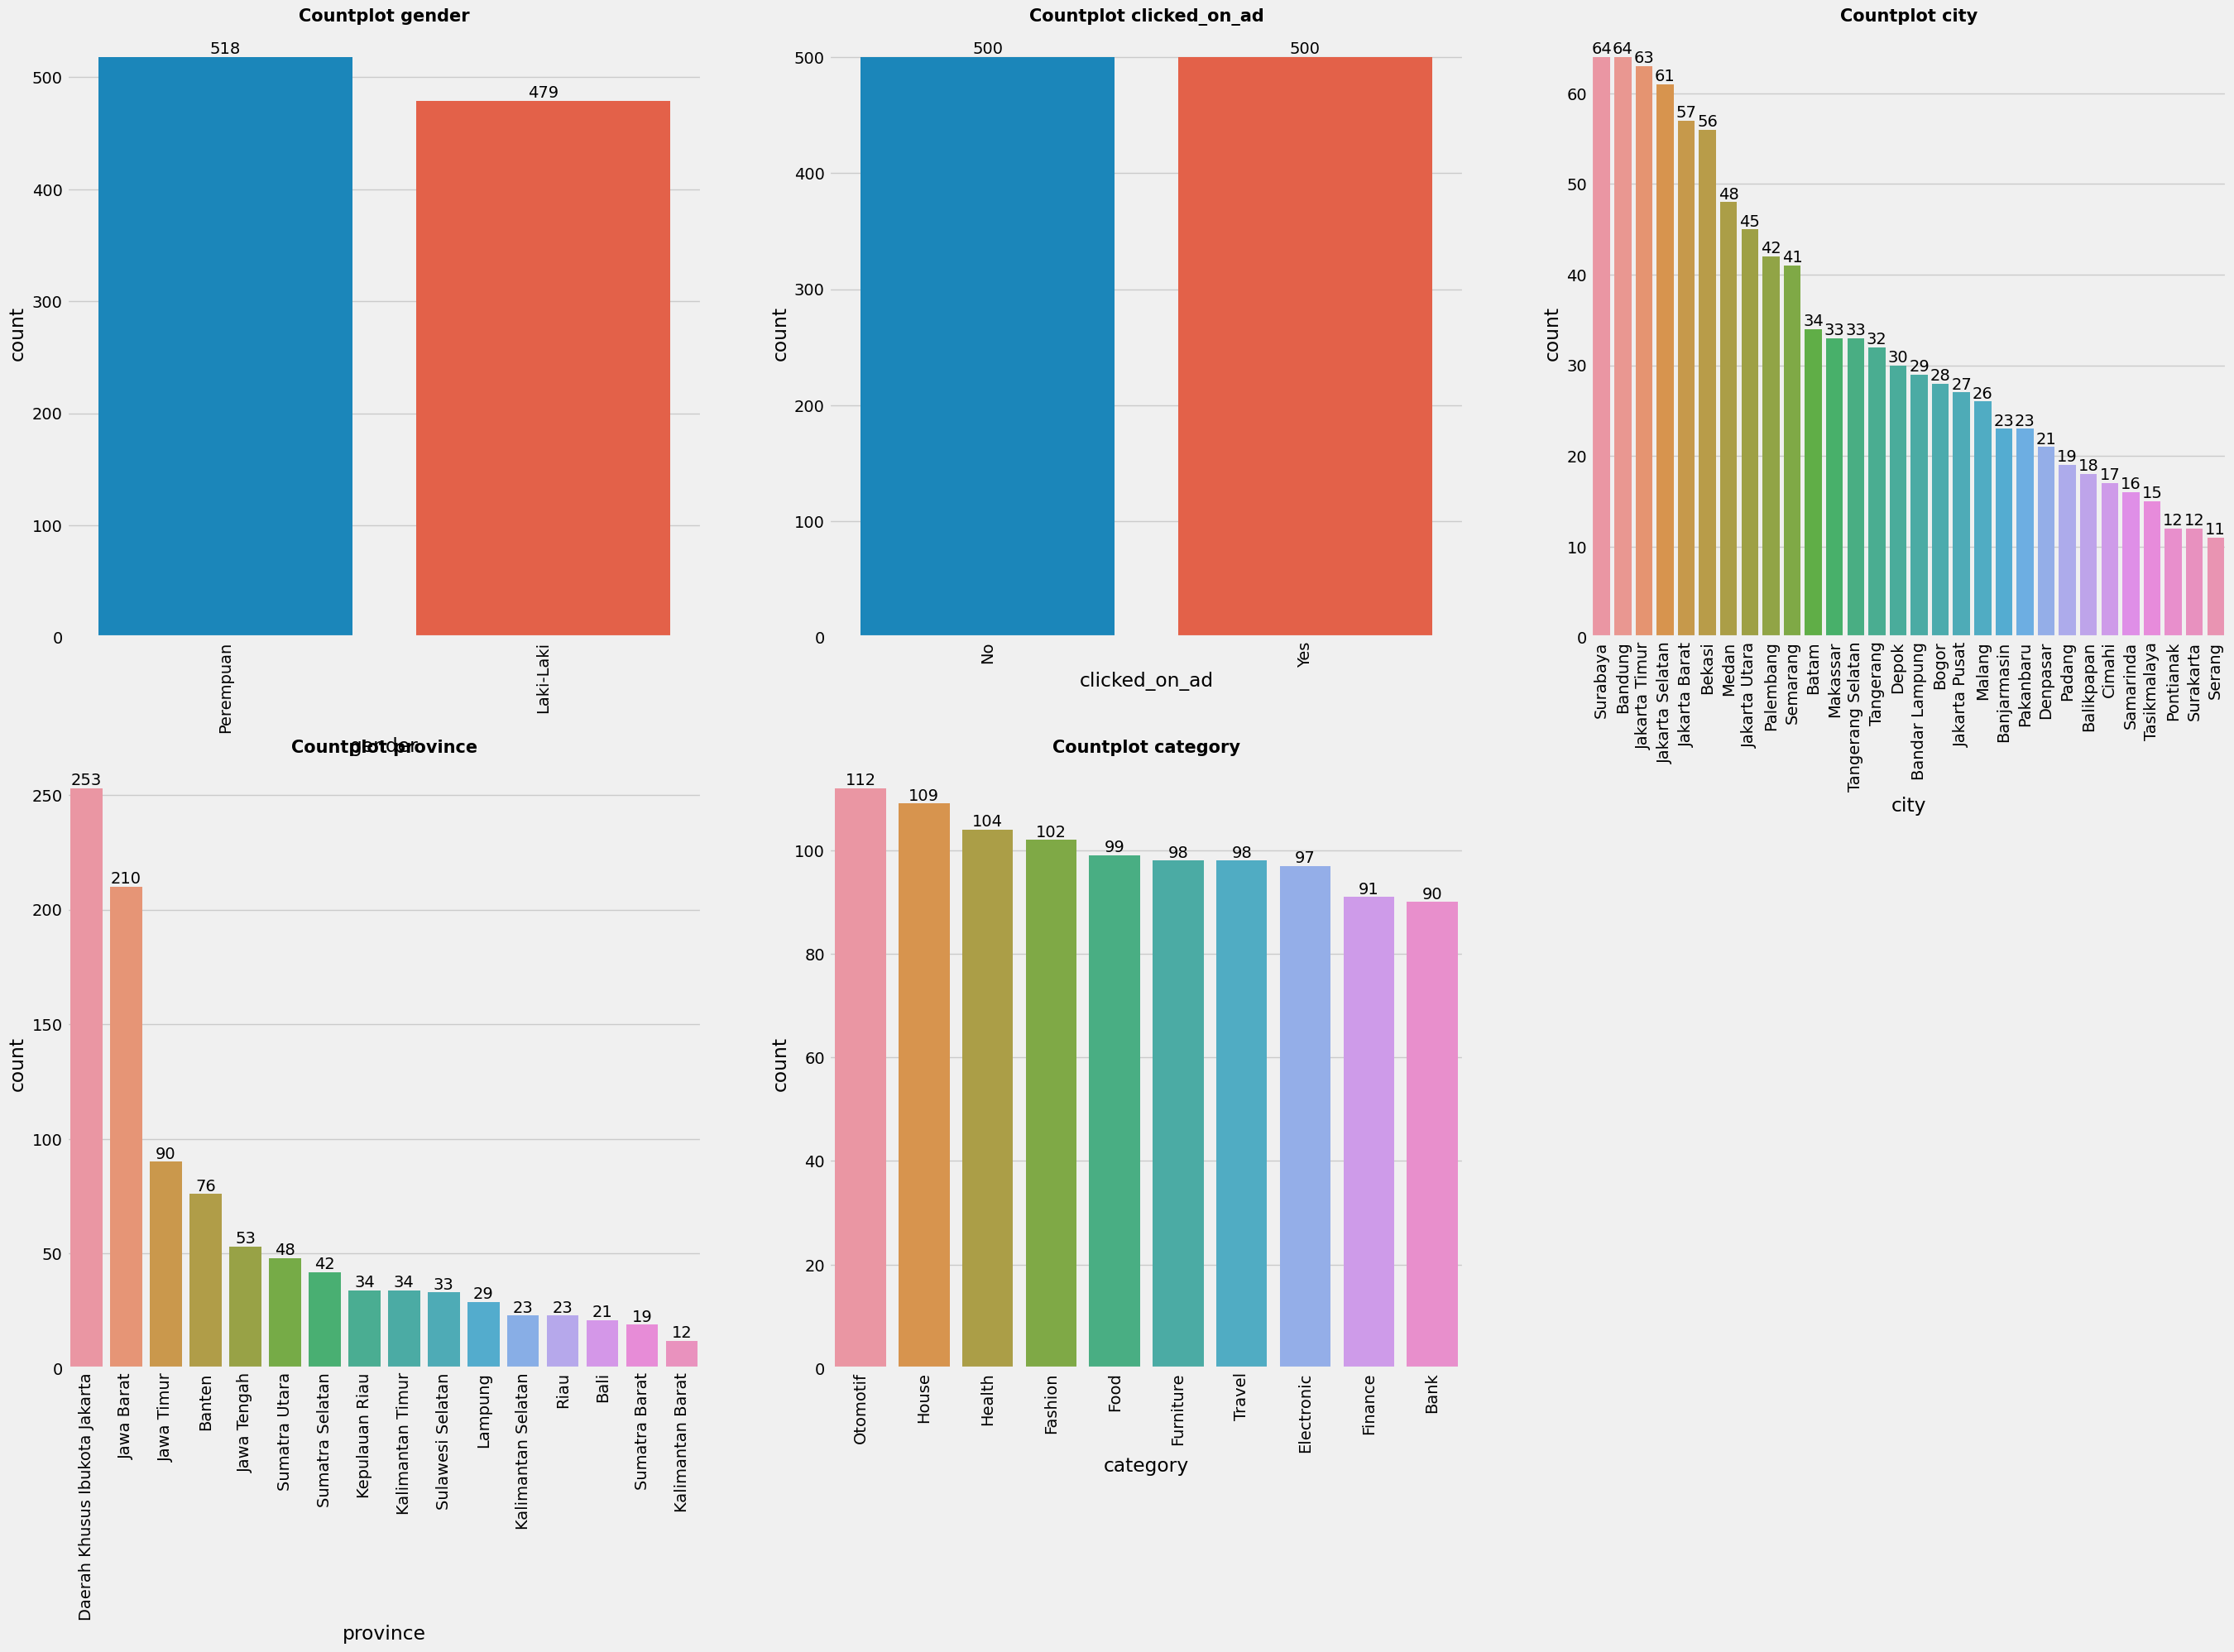

In [6]:
# check distribution categorical feature
kat = list(df.select_dtypes("object"))
plt.figure(figsize=(30, 20))
for i in range (0, len(kat)):
  plt.subplot(math.ceil(len(kat)/3),3, i+1)
  ax = sns.countplot(x=df[kat[i]], order = df[kat[i]].value_counts().index)
  plt.title('Countplot {}'.format(kat[i]), fontsize = 15 , fontweight = "bold")
  plt.xticks(rotation = 90)
  for i in ax.containers :
    plt.bar_label(i)

- here we can see that the target variable `clicked on ad` has a balanced distribution
- The categorical features look clean and there are no unknown values

Text(0.5, 1.0, 'Ratio Clicked On Ads')

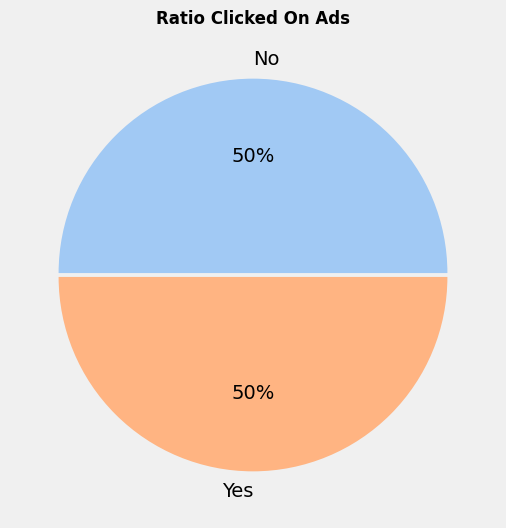

In [8]:
plt.figure(figsize= (6,6))
df["clicked_on_ad"].value_counts().plot(kind= "pie",colors= sns.set_palette("pastel") ,autopct='%1.f%%',
                                    explode= [0.01,0.01])
plt.ylabel("")
plt.title("Ratio Clicked On Ads", fontsize = 12, fontweight = "bold")

It is visible that the target feature has a balanced ratio, indicating that it is not unbalanced and that additional sampling is not required.

## Bivariate analysis

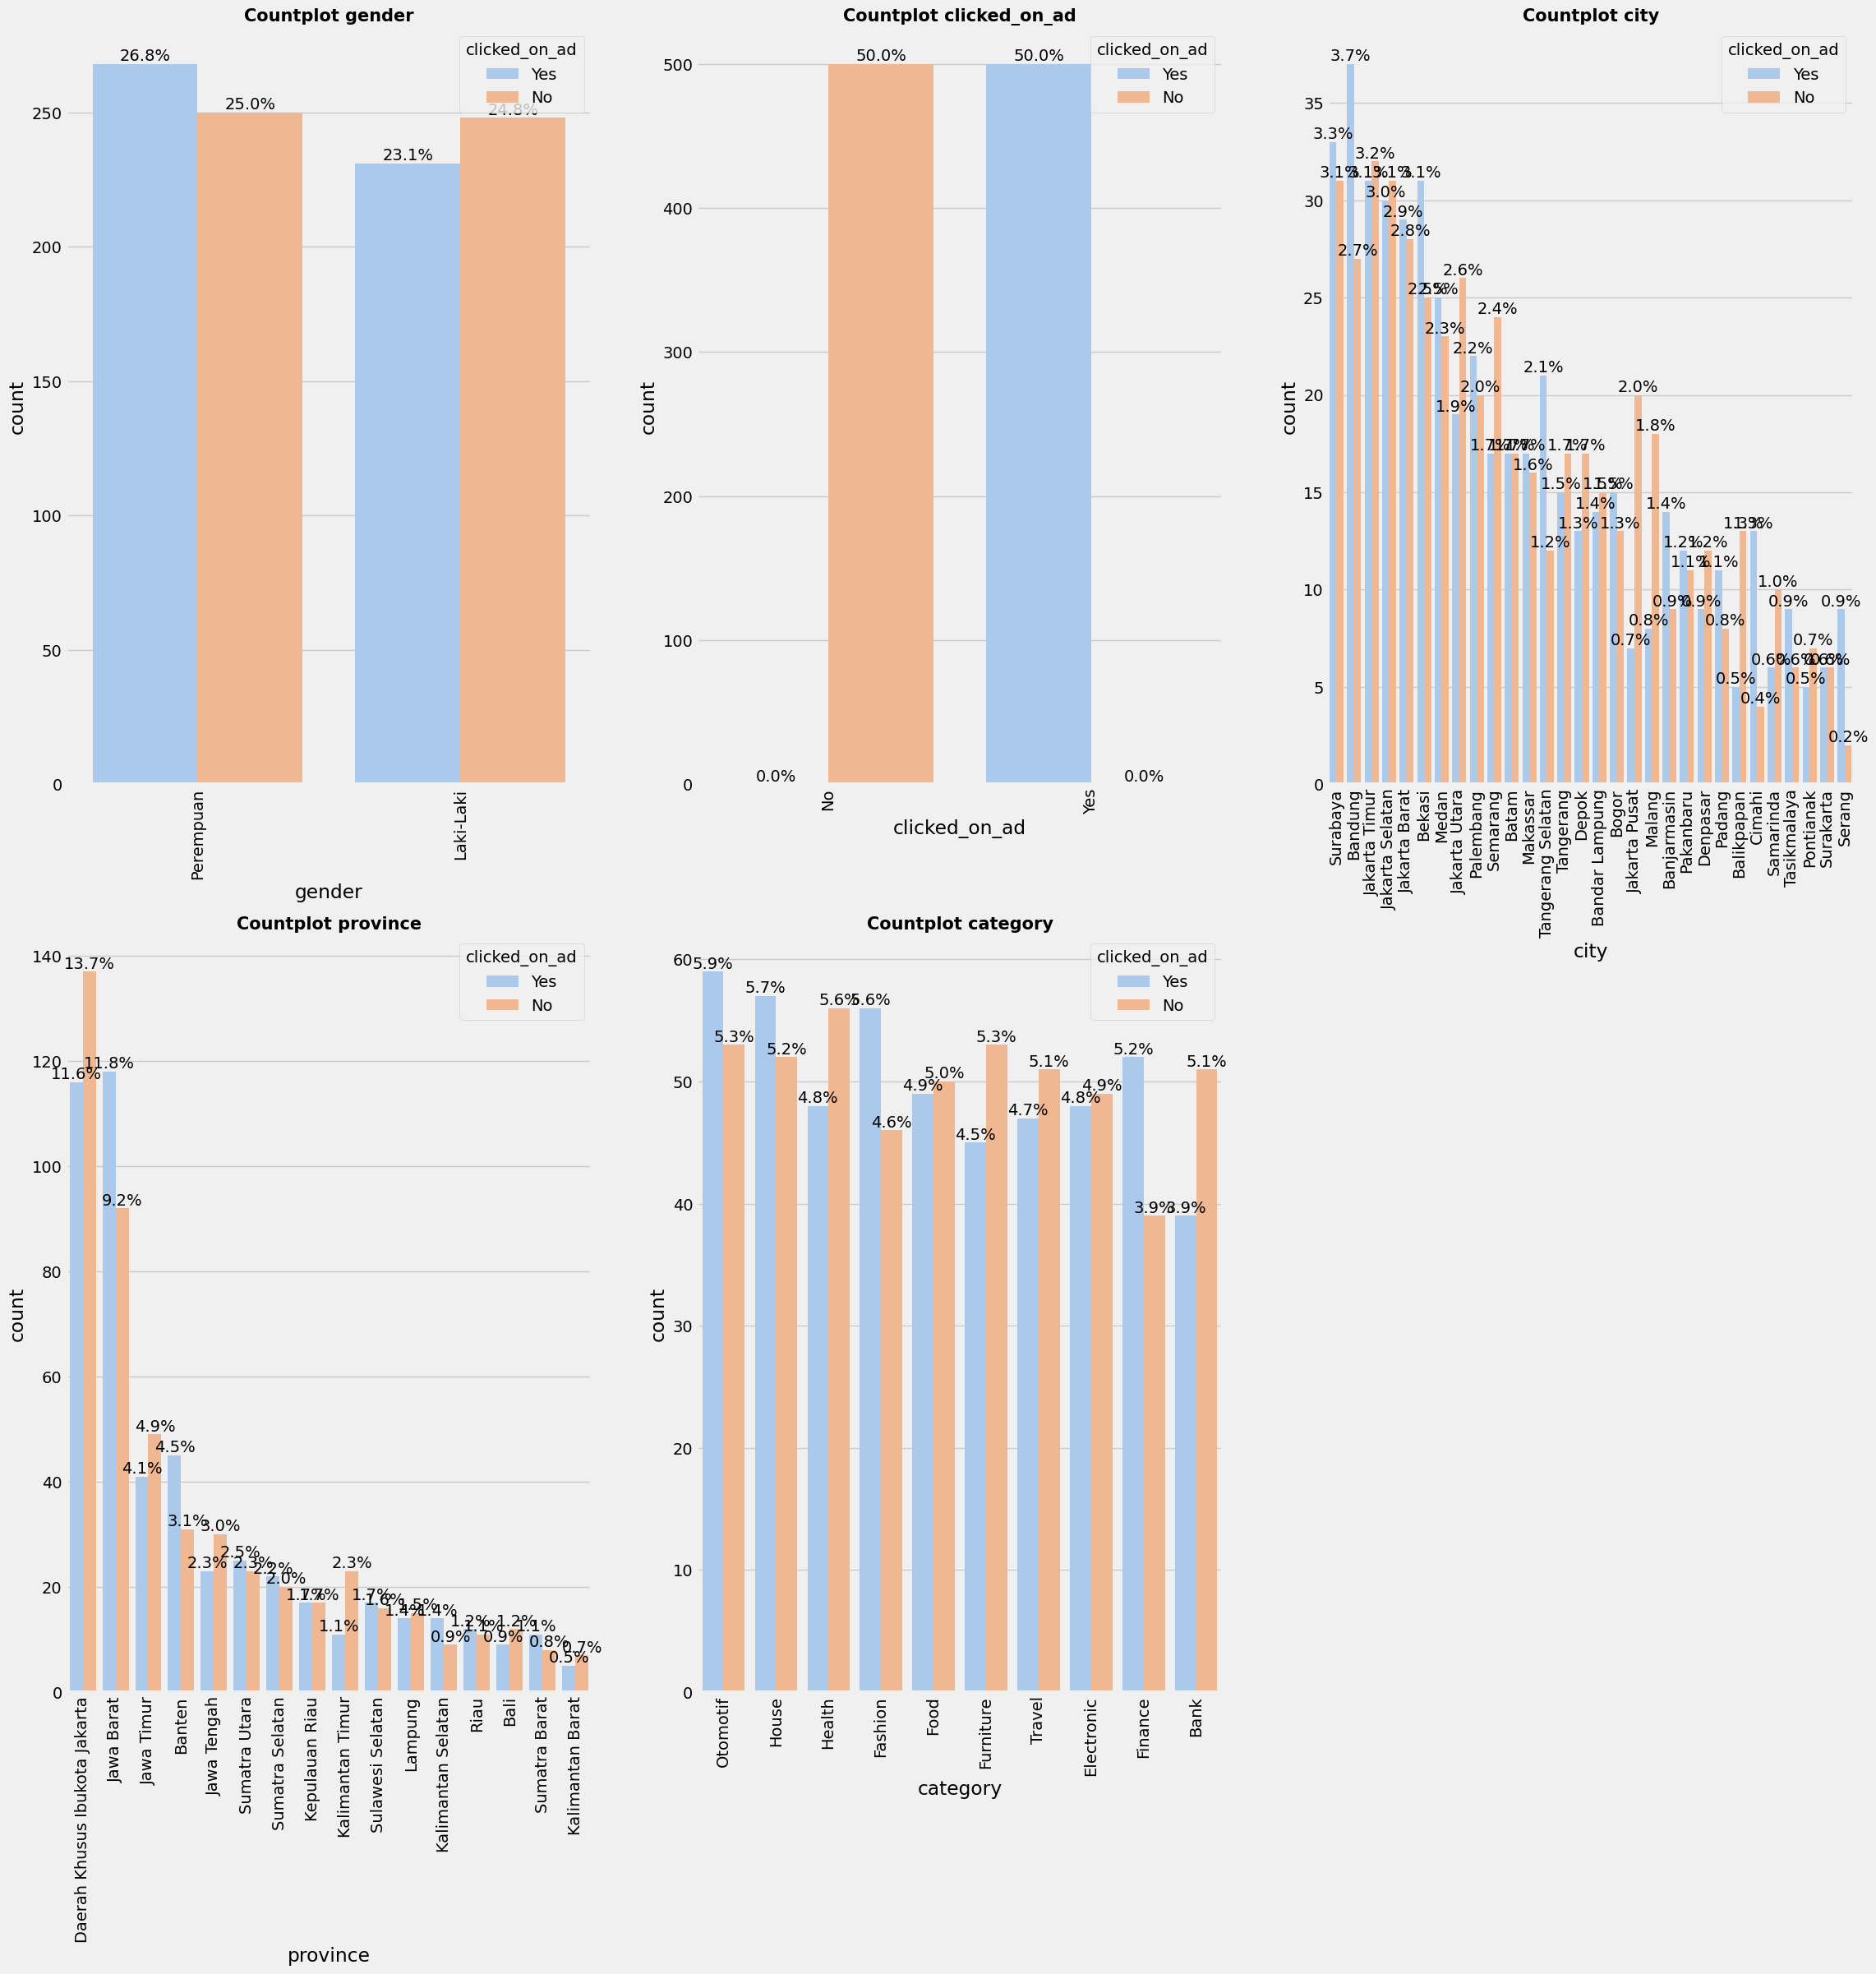

In [9]:
df1 = df.copy()

total = df["clicked_on_ad"].count()

plt.figure(figsize=(25, 25))
for i in range (0, len(kat)):
  plt.subplot(math.ceil(len(kat)/3),3, i+1)
  ax = sns.countplot(x=df[kat[i]], order = df[kat[i]].value_counts().index, hue= df1["clicked_on_ad"], hue_order= ["Yes", "No"])
  plt.title('Countplot {}'.format(kat[i]), fontsize = 15 , fontweight = "bold")
  plt.xticks(rotation = 90)
  for i in ax.containers :
    plt.bar_label(i, fmt=lambda x: f'{(x/total)*100:0.1f}%')


## Insight 
- In terms of `gender` features, it can be seen that women click on advertisements more often compared to men who tend not to click on advertisements.
- It can be seen in the advertising category, it turns out that automotive clicks on advertisements more often than other categories.
- If you look more closely, the comparison between the number of people who clicked on the ad and those who didn't click on the ad doesn't have a significant difference.

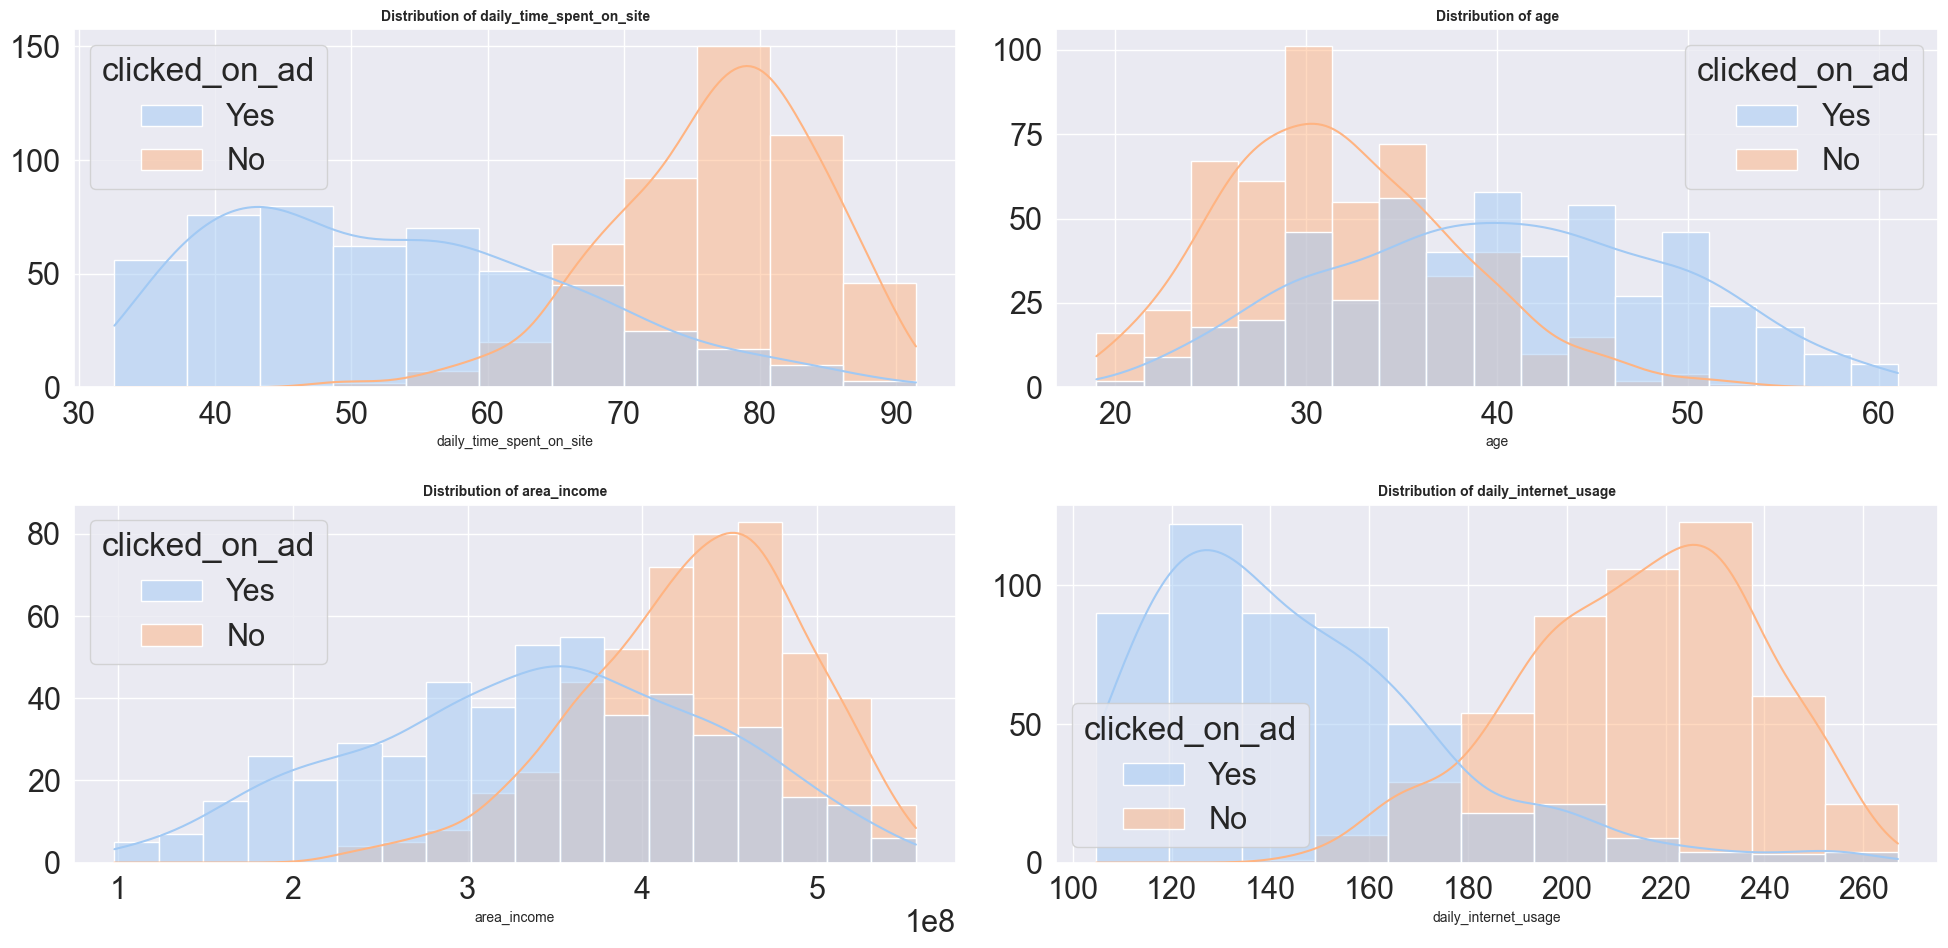

In [218]:
color = sns.color_palette("pastel")
plt.figure(figsize= (20,10))
for i in range(0, len(num)):
    plt.subplot(math.ceil(len(num)/2), 2, i+1)
    sns.histplot(x=df1[num[i]], kde = True, hue = df1['clicked_on_ad'],palette=color, hue_order=["Yes", "No"])
    plt.title('Distribution of {}'.format(num[i]),fontweight='bold', fontsize = 10)
    #plt.legend()
    plt.xlabel(num[i],fontsize = 10)
    plt.ylabel("")
    plt.tight_layout()

## Result : 
- The best time for a customer to see an advertisement click is between 40 and 60 minutes, as this is when customers are most likely to click on it. 
- Customers who often use the internet tend not to click on ads, this is inversely proportional to customers who don't use the internet often, who often click on ads.
- Customers who click on advertisements are often between the ages of 35 and 50. This could be because younger people are more likely to be tech savvy and may be more aware of how to avoid advertisements by using ad blocking software or other techniques.

because we only have analysis based on minutes, we will try time analysis using months, weekdays from extracting the `timestamp` feature

In [10]:
# extract timestamp
df2 = df1.copy()
df2["month"] = pd.to_datetime(df1.timestamp).dt.month
df2["weekdays"] = pd.to_datetime(df1.timestamp).dt.day_name()
df2.sample(1)


daily_time_spent_on_site  age  area_income  daily_internet_usage  \
982                     54.37   38  505374030.0                140.77   

        gender           timestamp clicked_on_ad       city province  \
982  Perempuan 2016-06-25 18:17:00           Yes  Tangerang   Banten   

     category  month  weekdays  
982  Otomotif      6  Saturday

In [82]:
df_group = df2.groupby(["month"])["clicked_on_ad"].value_counts().reset_index(name= "total")
df_group

month clicked_on_ad  total
0       1            No     78
1       1           Yes     69
2       2           Yes     83
3       2            No     77
4       3            No     82
5       3           Yes     74
6       4           Yes     74
7       4            No     73
8       5           Yes     79
9       5            No     68
10      6            No     71
11      6           Yes     71
12      7            No     51
13      7           Yes     50

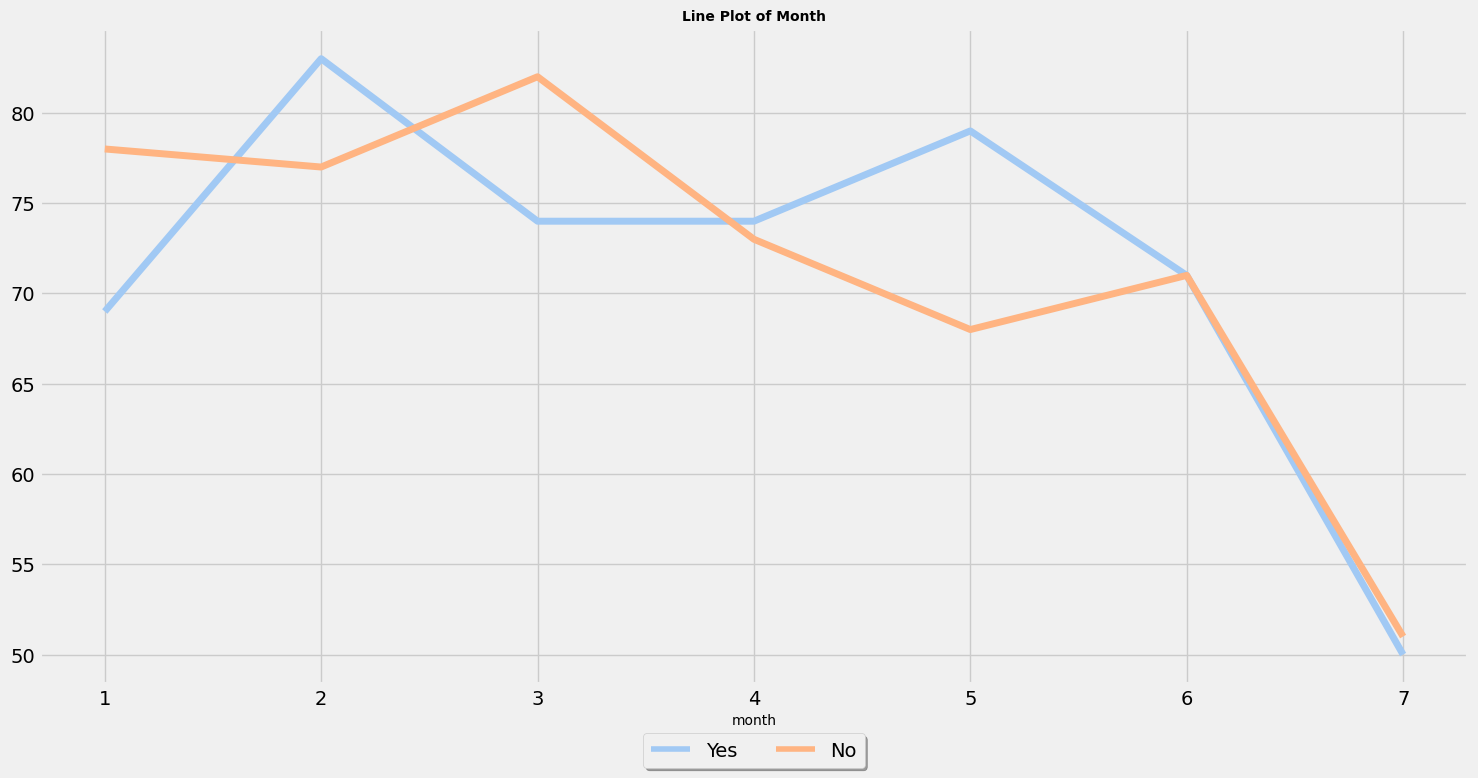

In [83]:
plt.style.use("fivethirtyeight")
plt.figure(figsize= (15,8))
ax = sns.lineplot(x="month", y= 'total',data= df_group ,hue='clicked_on_ad', hue_order= ["Yes","No"], palette= color, linewidth = 5, )
plt.title('Line Plot of Month',fontweight='bold', fontsize = 10)
plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.06),
           fancybox=True,
           shadow=True,
           ncol=4)
plt.xlabel("month",fontsize = 10)
plt.ylabel("")
plt.tight_layout()

## result
- Customers who clicked on adverts climbed up in February and May, after that it decreased.
- Customers who clicked on adverts reduced between March and June, which could be because particular businesses or items have peak seasons. If the marketed product or service is in high demand in February but drops in June, this could be a natural business trend.
- To overcome this, extensive analytical reviews of advertising data, listening to client input, and possibly adapting marketing techniques to match changes in customer wants or preferences are all needed.

In [124]:
df_group2 = df2.groupby(["weekdays"])["clicked_on_ad"].value_counts().reset_index(name= "total")
df_group2["weekdays"] = pd.Categorical(df_group2.weekdays,
                                       categories =['Monday' , 'Tuesday','Wednesday' ,'Thursday','Friday', 'Saturday' ,'Sunday'],
                                       ordered= True)
df_group2 = df_group2.sort_values("weekdays")
df_group2

weekdays clicked_on_ad  total
2      Monday           Yes     72
3      Monday            No     68
10    Tuesday            No     67
11    Tuesday           Yes     55
12  Wednesday           Yes     79
13  Wednesday            No     77
8    Thursday           Yes     79
9    Thursday            No     63
0      Friday            No     84
1      Friday           Yes     71
4    Saturday           Yes     64
5    Saturday            No     62
6      Sunday           Yes     80
7      Sunday            No     79

Monday is the official first day of the week according to ISO 8601.


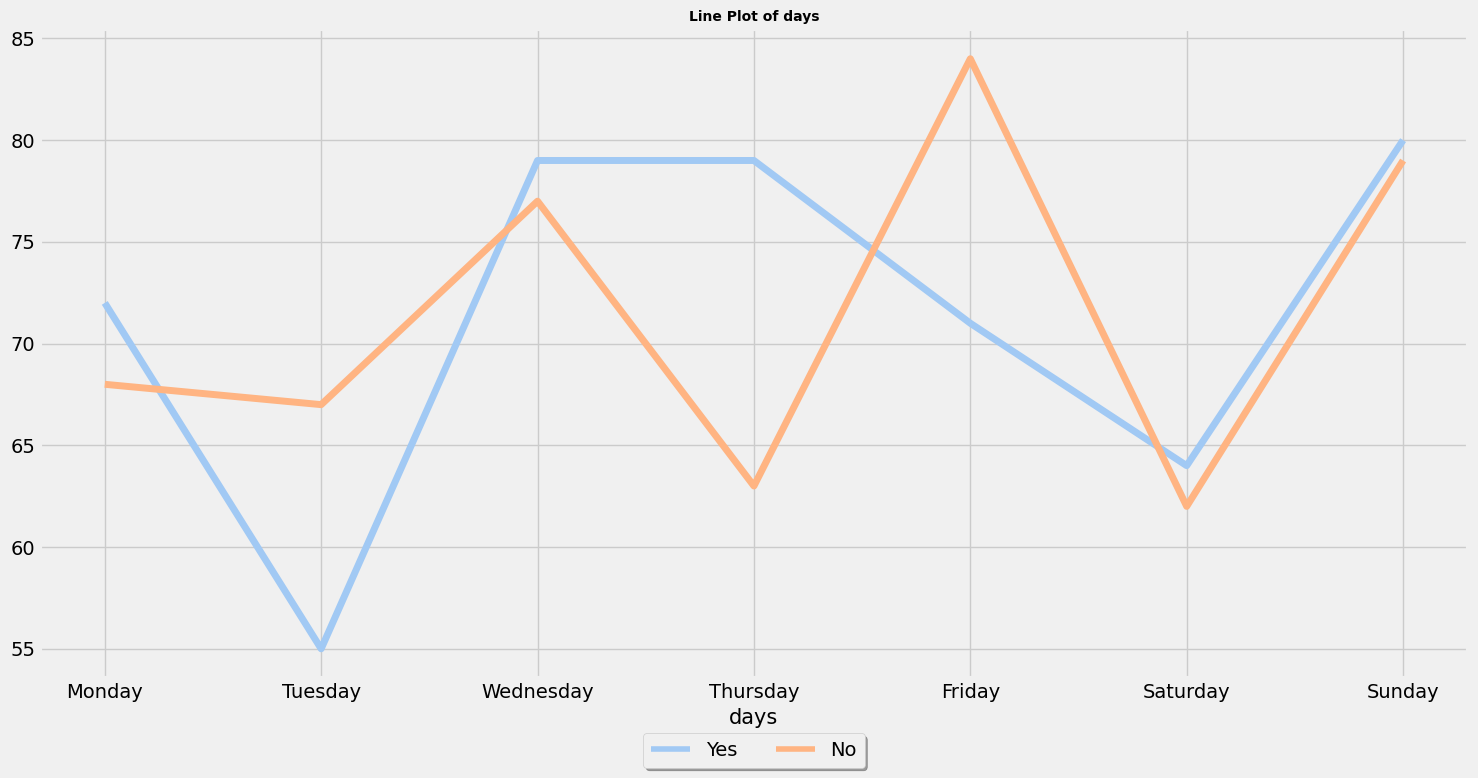

In [125]:
plt.style.use("fivethirtyeight")
plt.figure(figsize= (15,8))
ax = sns.lineplot(x="weekdays", y= 'total',data= df_group2 ,hue='clicked_on_ad', hue_order= ["Yes","No"], palette= color, linewidth = 5, )
plt.title('Line Plot of days',fontweight='bold', fontsize = 10)
plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.07),
           fancybox=True,
           shadow=True,
           ncol=4)
plt.xlabel("days",fontsize = 15)
plt.ylabel("")
plt.tight_layout()

### result : 
- On Tuesdays, users may experience routine changes that influence when and how they interact with advertisements. It may be required to determine whether there is a shift in consumer behavior trends on that particular day.
- On the other hand, user clicks on ads increase greatly on Friday, possibly because it is a day when people are more inclined to relax and have more free time, especially if it is followed by a weekend. This increases the likelihood that consumers will interact with advertisements.

## Multivariate analysis 

<Figure size 2000x1000 with 0 Axes>

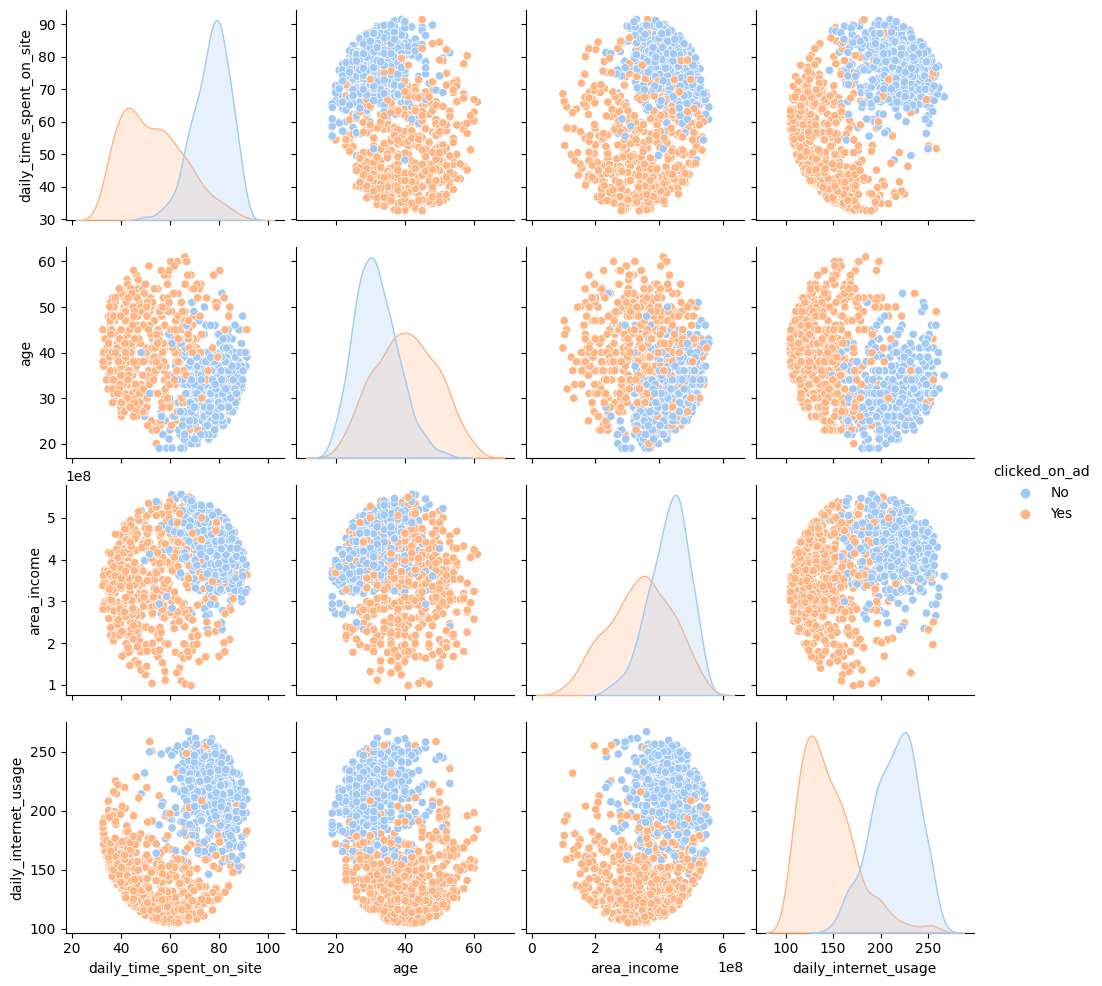

In [85]:
plt.style.use("default")
plt.figure(figsize= (20,10))
sns.pairplot(df1, diag_kind= "kde", hue= "clicked_on_ad", palette= color)



The pair plot above shows that the target features are balanced, so it will produce a good model


<Axes: >

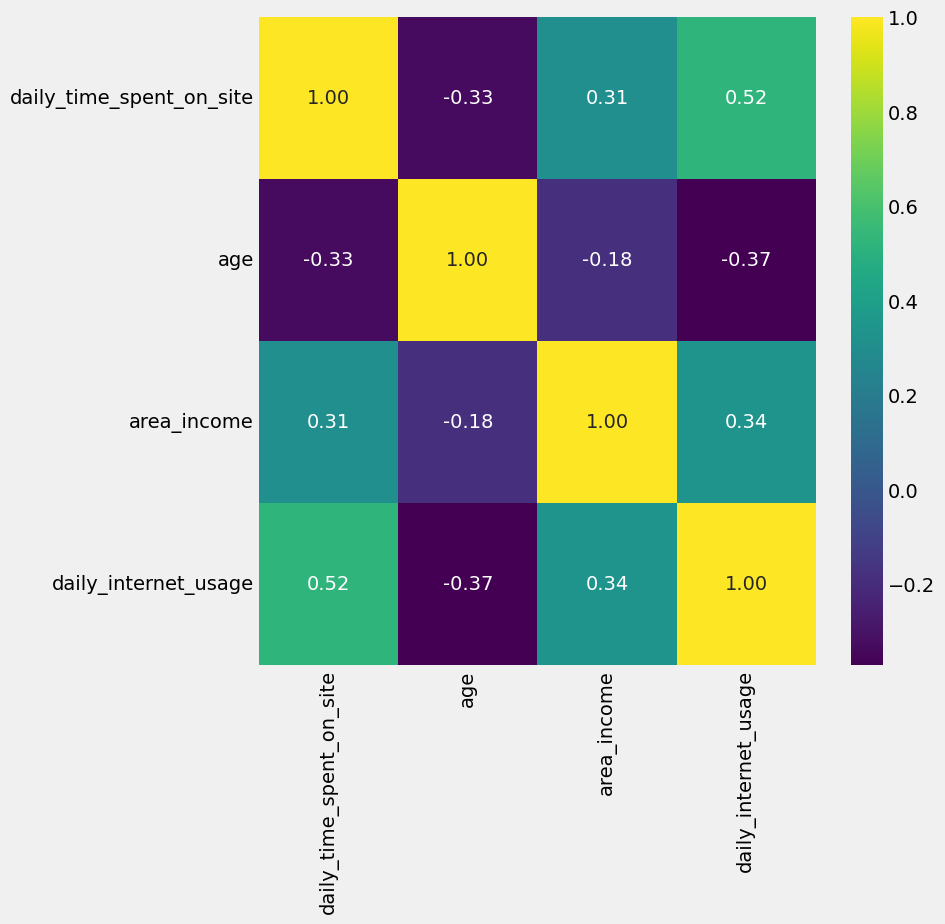

In [12]:
plt.figure(figsize=(8, 8))
sns.heatmap(df2[num].corr(), cmap='viridis', annot=True, fmt='.2f')

## Result : 
- `daily time spent on site` and `area income` have a fairly high correlation.
- `daily time spent on site` and `daily internet usage` also have a high correlation, but it is still not enough to be said to be redundant so a vif test will be carried out later.
- `area income` and `daily internet usage` also have a pretty good correlation too.
That's all the features that have a correlation with other features, but because the target feature has not yet been encoded, a heatmap will be carried out after the data has been preprocessed.

## Data Preprocessing 

In [13]:
# missing value income, daily time spent, internet usage, gender 
df3 = df2.copy()
missing = ['daily_time_spent_on_site','area_income','daily_internet_usage']
for i in missing :
    df3[i].fillna(df3[i].median(), inplace= True)

df3["gender"].fillna(df3.gender.mode()[0], inplace= True)
df3.isnull().sum()

daily_time_spent_on_site    0
age                         0
area_income                 0
daily_internet_usage        0
gender                      0
timestamp                   0
clicked_on_ad               0
city                        0
province                    0
category                    0
month                       0
weekdays                    0
dtype: int64

Filling in missing values for numerical features uses the median value because the median is relatively robust against outliers (not affected by very high or low values) and does not affect the distribution of the data at the beginning.
for feature gender fill with mode.

## Handle outlier 

as explained at the beginning and a qq plot analysis has been carried out if the outliers are still normal/collective outliers, so no handling will be carried out

## Feauture encoding

In [14]:
# One hot encoding
df3 = pd.get_dummies(df3, columns= ["category"], dtype= "int64")
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   daily_time_spent_on_site  1000 non-null   float64       
 1   age                       1000 non-null   int64         
 2   area_income               1000 non-null   float64       
 3   daily_internet_usage      1000 non-null   float64       
 4   gender                    1000 non-null   object        
 5   timestamp                 1000 non-null   datetime64[ns]
 6   clicked_on_ad             1000 non-null   object        
 7   city                      1000 non-null   object        
 8   province                  1000 non-null   object        
 9   month                     1000 non-null   int32         
 10  weekdays                  1000 non-null   object        
 11  category_Bank             1000 non-null   int64         
 12  category_Electronic  

In [ ]:
#change all boolean to int64
#df3.loc[:, df3.dtypes.eq('bool')] = df3.loc[:, df3.dtypes.eq('bool')].astype(np.int64)
#df3.info()

In [15]:
#encode = ["gender", "clicked_on_ad"]
label = LabelEncoder()
df3["gender"] = label.fit_transform(df3.gender)

df3["clicked_on_ad"] = df3["clicked_on_ad"].map({"Yes" : 1 , "No" : 0})

days = {"Monday" : 0,
        "Tuesday" : 1, 
        'Wednesday' : 2 ,
        'Thursday' : 3,
        'Friday' : 4, 
        'Saturday' : 5 ,
        'Sunday' : 6}

df3["weekdays"] = df3.weekdays.map(days)

Monday is the official first day of the week according to ISO 8601.


In [14]:
df3["clicked_on_ad"].value_counts()

clicked_on_ad
0    500
1    500
Name: count, dtype: int64

## Feature selection 

In [16]:
df4 = df3.drop(["city", "province","timestamp"], axis = 1)

Because there are too many unique values, they will just be dropped

<Axes: >

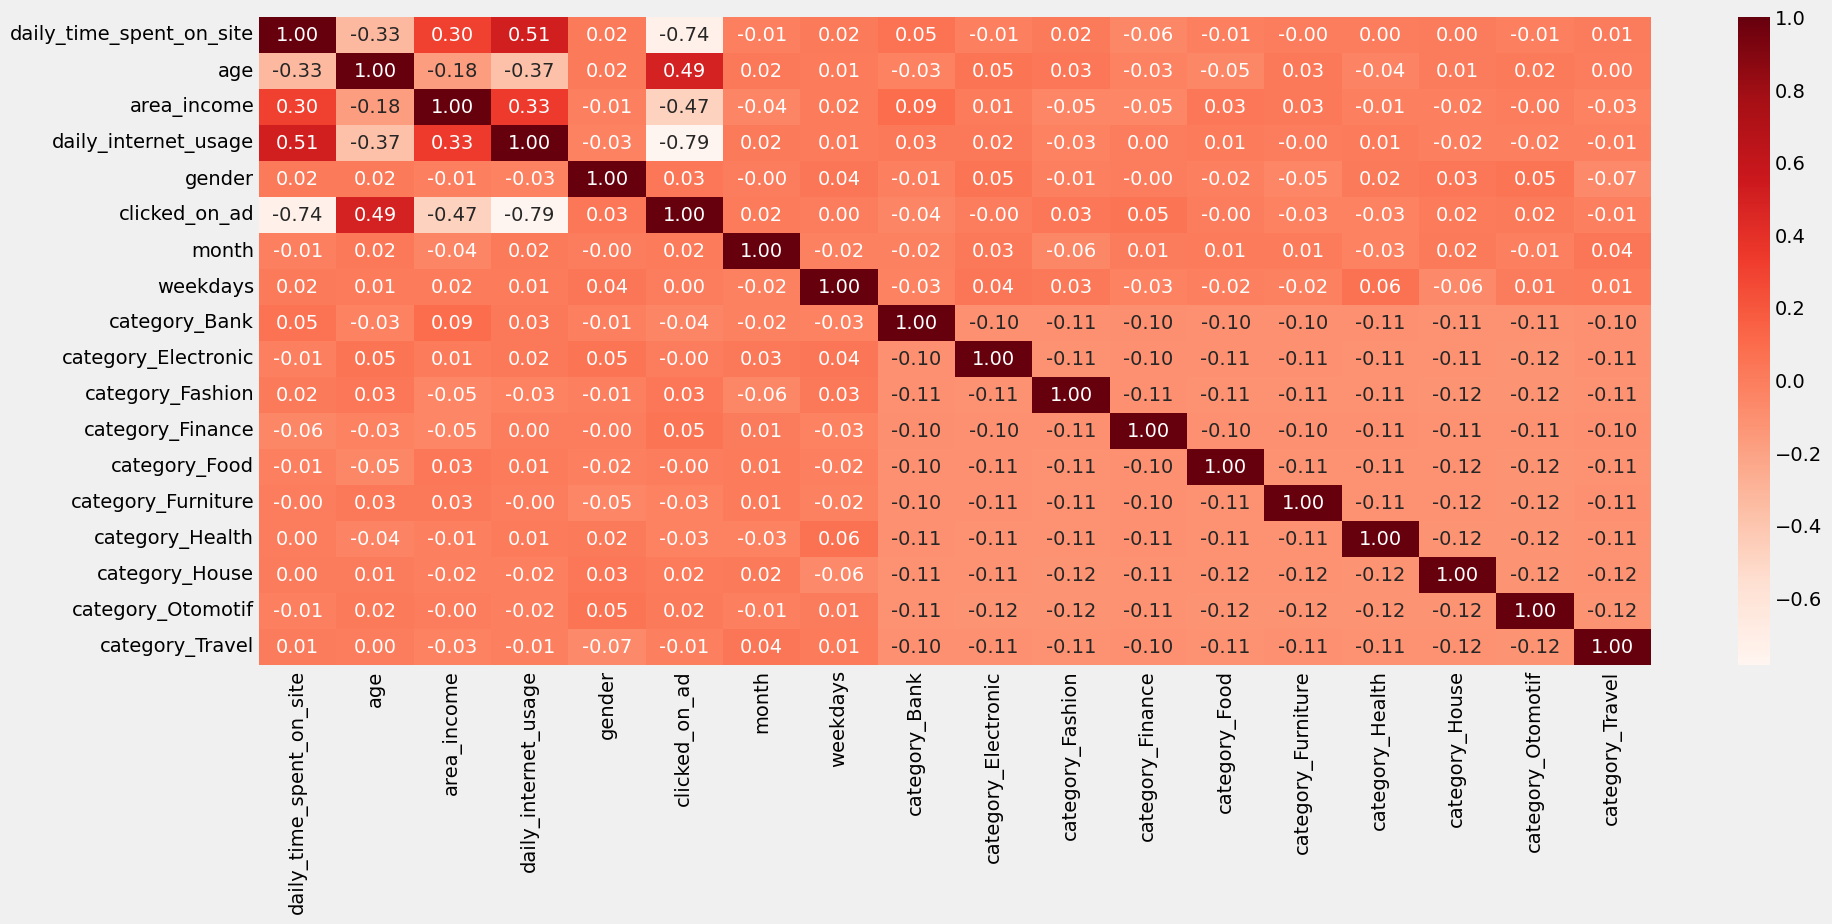

In [148]:
plt.figure(figsize=(20, 8))
sns.heatmap(df4.corr(), cmap='Reds', annot=True, fmt='.2f')

From the heatmap above features that have a strong correlation with the target feature:
- daily time spent
- age
- income area
- daily internet usage
- gender

because some of these features have indications of being redundant, we will carry out a multicollinearity test, and also to take the best features for modeling, we will use kbest selection.


In [149]:
def cal_vif(df):
   vif = pd.DataFrame()
   vif["variable"] = df.columns
   vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
   return(vif)

cal_vif(df4[[i for i in df4.describe().columns if i not in ['clicked_on_ad']]])

variable        VIF
0   daily_time_spent_on_site   1.451499
1                        age   1.210078
2                area_income   1.176150
3       daily_internet_usage   1.520483
4                     gender   1.017097
5                      month   1.011871
6                   weekdays   1.013843
7              category_Bank   8.423711
8        category_Electronic   9.169371
9           category_Fashion   9.186062
10          category_Finance   7.997841
11             category_Food   8.799553
12        category_Furniture   9.025498
13           category_Health   9.246591
14            category_House   9.720531
15         category_Otomotif  10.059624
16           category_Travel   8.840944

Selecting features with a VIF below <10 aims to optimize the regression model. By reducing the level of multicollinearity, the model can provide more stable and reliable results.

Following that, we separate using variables X and Y to apply kbest selection.

In [17]:

X = df4.drop(["clicked_on_ad"], axis = 1)
y = df4[["clicked_on_ad"]]

In [19]:
X

daily_time_spent_on_site  age  area_income  daily_internet_usage  gender  \
0                       68.95   35  432837300.0                256.09       1   
1                       80.23   31  479092950.0                193.77       0   
2                       69.47   26  418501580.0                236.50       1   
3                       74.15   29  383643260.0                245.89       0   
4                       68.37   35  517229930.0                225.58       1   
..                        ...  ...          ...                   ...     ...   
995                     72.97   30  499691990.0                208.58       0   
996                     51.30   45  474475190.0                134.42       0   
997                     68.11   51  296910040.0                120.37       0   
998                     55.55   19  293445530.0                187.95       1   
999                     45.01   26  209130600.0                178.35       1   

     month  weekdays  category_Electronic  category_Fashion  category_Finance  \
0        3         6                    0                 0                 0   
1        4         0                    0                 0                 0   
2        3         6                    1                 0                 0   
3        1         6                    0                 0                 0   
4        6         4                    0                 0                 1   
..     ...       ...                  ...               ...               ...   
995      2         3                    0                 0                 1   
996      4         4                    1                 0                 0   
997      2         0                    0                 0                 0   
998      3         3                    0                 0                 0   
999      6         4                    0                 0                 0   

     category_Food  category_Furniture  category_Health  category_House  \
0                0                   1                0               0   
1                1                   0                0               0   
2                0                   0                0               0   
3                0                   0                0               1   
4                0                   0                0               0   
..             ...                 ...              ...             ...   
995              0                   0                0               0   
996              0                   0                0               0   
997              0                   0                0               0   
998              0                   0                0               0   
999              0                   0                0               0   

     category_Otomotif  category_Travel  
0                    0                0  
1                    0                0  
2                    0                0  
3                    0                0  
4                    0                0  
..                 ...              ...  
995                  0                0  
996                  0                0  
997                  0                1  
998                  0                0  
999                  0                1  

[1000 rows x 16 columns]

In [18]:

selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]

print('Top Feature :', list(selected_features))

Top Feature : ['daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage', 'gender', 'category_Bank', 'category_Fashion', 'category_Finance', 'category_Furniture', 'category_Health']


Based on kbest 10 important features only : 
- `daily_time_spent_on_site`, 
- `age`, `area_income`, 
- `daily_internet_usage`,
- `gender`, 
- `category_Bank`,
- `category_Fashion`, 
- `category_Finance`, 
- `category_Furniture`,
- `category_Health`

In [19]:
X = X[['daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage', 'gender', 'category_Bank', 'category_Fashion', 'category_Finance', 'category_Furniture', 'category_Health']]

## First attempt at modeling without normalizing the data

In [20]:
# split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3 , random_state= 42)


### Feature with scaling

In [21]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= X.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns= X.columns)

## Modeling 
trying different ML learning models on a dataset to see how each model performs.
*   Logistic Regression
*   XGBoost
*   Decision Tree
*   Random Forest
*   Naive Bayes
*   KNN
*   Gradient boost

* **Precision :** Precision is the ratio of actual True Positive predictions to the total number of Positive predictions.

* **Recall :** Recall is the ratio of actual True positive predictions to the total number of actual positive cases.

* **F1-Score :** calculates the balance of the mean of precision and recall

* **Confusion Matrix :** The confusion matrix shows the number of True Positive, False positive, True Negative, and False Negative predictions made by the model.

* **ROC Curve**: A receiver operating characteristic curve, or ROC curve, is a graphical plot that depicts the diagnostic capability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. True positive rate (TPR) is also known as sensitivity, recall, or detection probability in machine learning. False positive Rate is also known as false alarm probability and can be calculated as (1 − specificity).

* **Classification report :** Classification report visualization displays scores for precision, recall, F1, and support for the model. To support easier interpretation and problem detection, this report integrates numerical scores with heatmaps.

- For this dataset we focus on the f1 score evaluation metric, because we want to increase CTR by showing ads to users who are really interested and ensuring that as many actual clicks as possible, so f1 is the best evaluation metric


In [30]:
models = [
    ['Logistic Regression', LogisticRegression(random_state= 42)],
    ['XGB', XGBClassifier(tree_method = 'gpu_hist', verbosity = 0)],
    ['Decision Tree', DecisionTreeClassifier(random_state=42)],
    ['Random Forest', RandomForestClassifier(random_state=42)],
    ['Naive Bayes', GaussianNB()],
    ['KNN', KNeighborsClassifier()],
    ['Gradient Boosting', GradientBoostingClassifier()]]

In [31]:
# def build machine learning
def eval_classification(model):
    model_name = []
    #accuracy
    training_accuracy = []
    cv_accuracy_test = []
    # recall
    cv_recall_test = []
    training_recall = []
    # precision
    cv_precision_test = []
    training_precision = []
    # F1
    cv_f1_test = []
    training_f1 = []
    # ROC AUC
    cv_roc_auc_test = []
    training_roc_auc = []

    for name, model in models:
        model.fit(X_train, y_train)
        model_name.append(name)

        #score
        scoring= ['accuracy','recall', 'precision', 'f1', 'roc_auc']

        #CV
        cv_score = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, n_jobs = -1)

        # train
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]



        training_accuracy.append(accuracy_score(y_train,y_pred_train))
        training_recall.append(recall_score(y_train,y_pred_train))
        training_precision.append(precision_score(y_train, y_pred_train))
        training_f1.append(f1_score(y_train, y_pred_train))
        training_roc_auc.append(roc_auc_score(y_train, y_pred_proba_train))


        #test
        cv_accuracy_test.append(abs(cv_score['test_accuracy']).mean())
        cv_recall_test.append(abs(cv_score['test_recall']).mean())
        cv_precision_test.append(abs(cv_score['test_precision']).mean())
        cv_f1_test.append(abs(cv_score['test_f1']).mean())
        cv_roc_auc_test.append(abs(cv_score['test_roc_auc']).mean())

    return pd.DataFrame({
        'Model': model_name,
        'training Accuracy' : training_accuracy,
        'CV Accuracy test' : cv_accuracy_test,
        'Training Recall' : training_recall,
        'CV Recall test': cv_recall_test,
        'Training Precision' : training_precision,
        'CV Precision test' : cv_precision_test,
        'Training F1' : training_f1,
        'CV F1 test' : cv_f1_test,
        'Training AUC_ROC' : training_roc_auc,
        'CV AUC_ROC test' : cv_roc_auc_test,
    })

In [32]:
# without scaling
without_scaling = eval_classification(models)
round(without_scaling,2)

Model  training Accuracy  CV Accuracy test  Training Recall  \
0  Logistic Regression               0.51              0.51             0.00   
1                  XGB               1.00              0.95             1.00   
2        Decision Tree               1.00              0.93             1.00   
3        Random Forest               1.00              0.96             1.00   
4          Naive Bayes               0.73              0.73             0.61   
5                  KNN               0.78              0.67             0.75   
6    Gradient Boosting               1.00              0.96             1.00   

   CV Recall test  Training Precision  CV Precision test  Training F1  \
0            0.00                0.00               0.00         0.00   
1            0.95                1.00               0.96         1.00   
2            0.94                1.00               0.92         1.00   
3            0.96                1.00               0.97         1.00   
4            0.62                0.79               0.80         0.69   
5            0.64                0.79               0.67         0.77   
6            0.95                1.00               0.97         1.00   

   CV F1 test  Training AUC_ROC  CV AUC_ROC test  
0        0.00              0.79             0.79  
1        0.95              1.00             0.99  
2        0.93              1.00             0.93  
3        0.96              1.00             0.99  
4        0.69              0.79             0.79  
5        0.65              0.86             0.73  
6        0.96              1.00             0.99

## Results :
- we can see that logistic regression without scaling has a very bad score, perhaps because regression is a linear model and the features without scaling have a lot of variance, so that is what causes the logistic score to be very bad
- For a model that is quite good, it is used in gradient boosting which has a reasonable F1 score and also if you look at Auc Roc, the model can be said to work well

let's try feature with scaling

In [34]:
# with scaling

with_scaling = eval_classification(models)
round(with_scaling,2)

Model  training Accuracy  CV Accuracy test  Training Recall  \
0  Logistic Regression               0.97              0.97             0.96   
1                  XGB               1.00              0.95             1.00   
2        Decision Tree               1.00              0.93             1.00   
3        Random Forest               1.00              0.96             1.00   
4          Naive Bayes               0.97              0.97             0.97   
5                  KNN               0.97              0.96             0.94   
6    Gradient Boosting               1.00              0.96             1.00   

   CV Recall test  Training Precision  CV Precision test  Training F1  \
0            0.96                0.97               0.97         0.97   
1            0.95                1.00               0.96         1.00   
2            0.94                1.00               0.92         1.00   
3            0.96                1.00               0.97         1.00   
4            0.96                0.97               0.97         0.97   
5            0.93                0.99               0.98         0.96   
6            0.95                1.00               0.97         1.00   

   CV F1 test  Training AUC_ROC  CV AUC_ROC test  
0        0.96              0.99             0.99  
1        0.95              1.00             0.99  
2        0.93              1.00             0.93  
3        0.96              1.00             0.99  
4        0.97              0.99             0.99  
5        0.96              1.00             0.98  
6        0.96              1.00             0.99

The model's purpose is to anticipate how many potential consumers will click on an advertisement. As a result, we must reduce the frequency of False Positives, or the incorrect prediction that consumers who do not click on advertisements will do so in the future. The best strategy to balance recall and precision is to use F1 score rather than retargeting the wrong market, which could result in losses because we wasted money on advertising on the wrong target.

Upon scaling the features, it is obvious that `Logistic Regression` and `KNN` have the highest f1 score and stable auc roc, indicating that the model is potentially effective. To ascertain which model is the best, additional analysis will be conducted by examining the confusion matrix, learning curve.

## Hyperparameters tuning 

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
logreg = LogisticRegression(random_state= 42)
param_logreg = {'penalty': ['l1','l2'],
                'C': [float(x) for x in np.linspace(0.5, 1, 10)],
                'fit_intercept' : [True,False],
                'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                'max_iter' : [int(x) for x in np.linspace(10, 100,1000)]}

logreg_rs = RandomizedSearchCV(logreg, param_distributions= param_logreg, scoring= 'f1',
                               random_state=42, cv=10, n_jobs=-1, verbose=1)

logreg_rs.fit(X_train, y_train)
print(logreg_rs.best_params_)
print(logreg_rs.score(X_train, y_train), logreg_rs.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'solver': 'sag', 'penalty': 'l2', 'max_iter': 27, 'fit_intercept': True, 'C': 0.8333333333333333}
0.9694323144104803 0.9677993154618637


There is no difference between before hyper and after hyper, so our assumption is that the model has reached the maximum score

## Confusion matrix logistic regression

Score train logreg
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       354
           1       0.98      0.96      0.97       346

    accuracy                           0.97       700
   macro avg       0.97      0.97      0.97       700
weighted avg       0.97      0.97      0.97       700

Score test logreg
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       146
           1       0.98      0.95      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



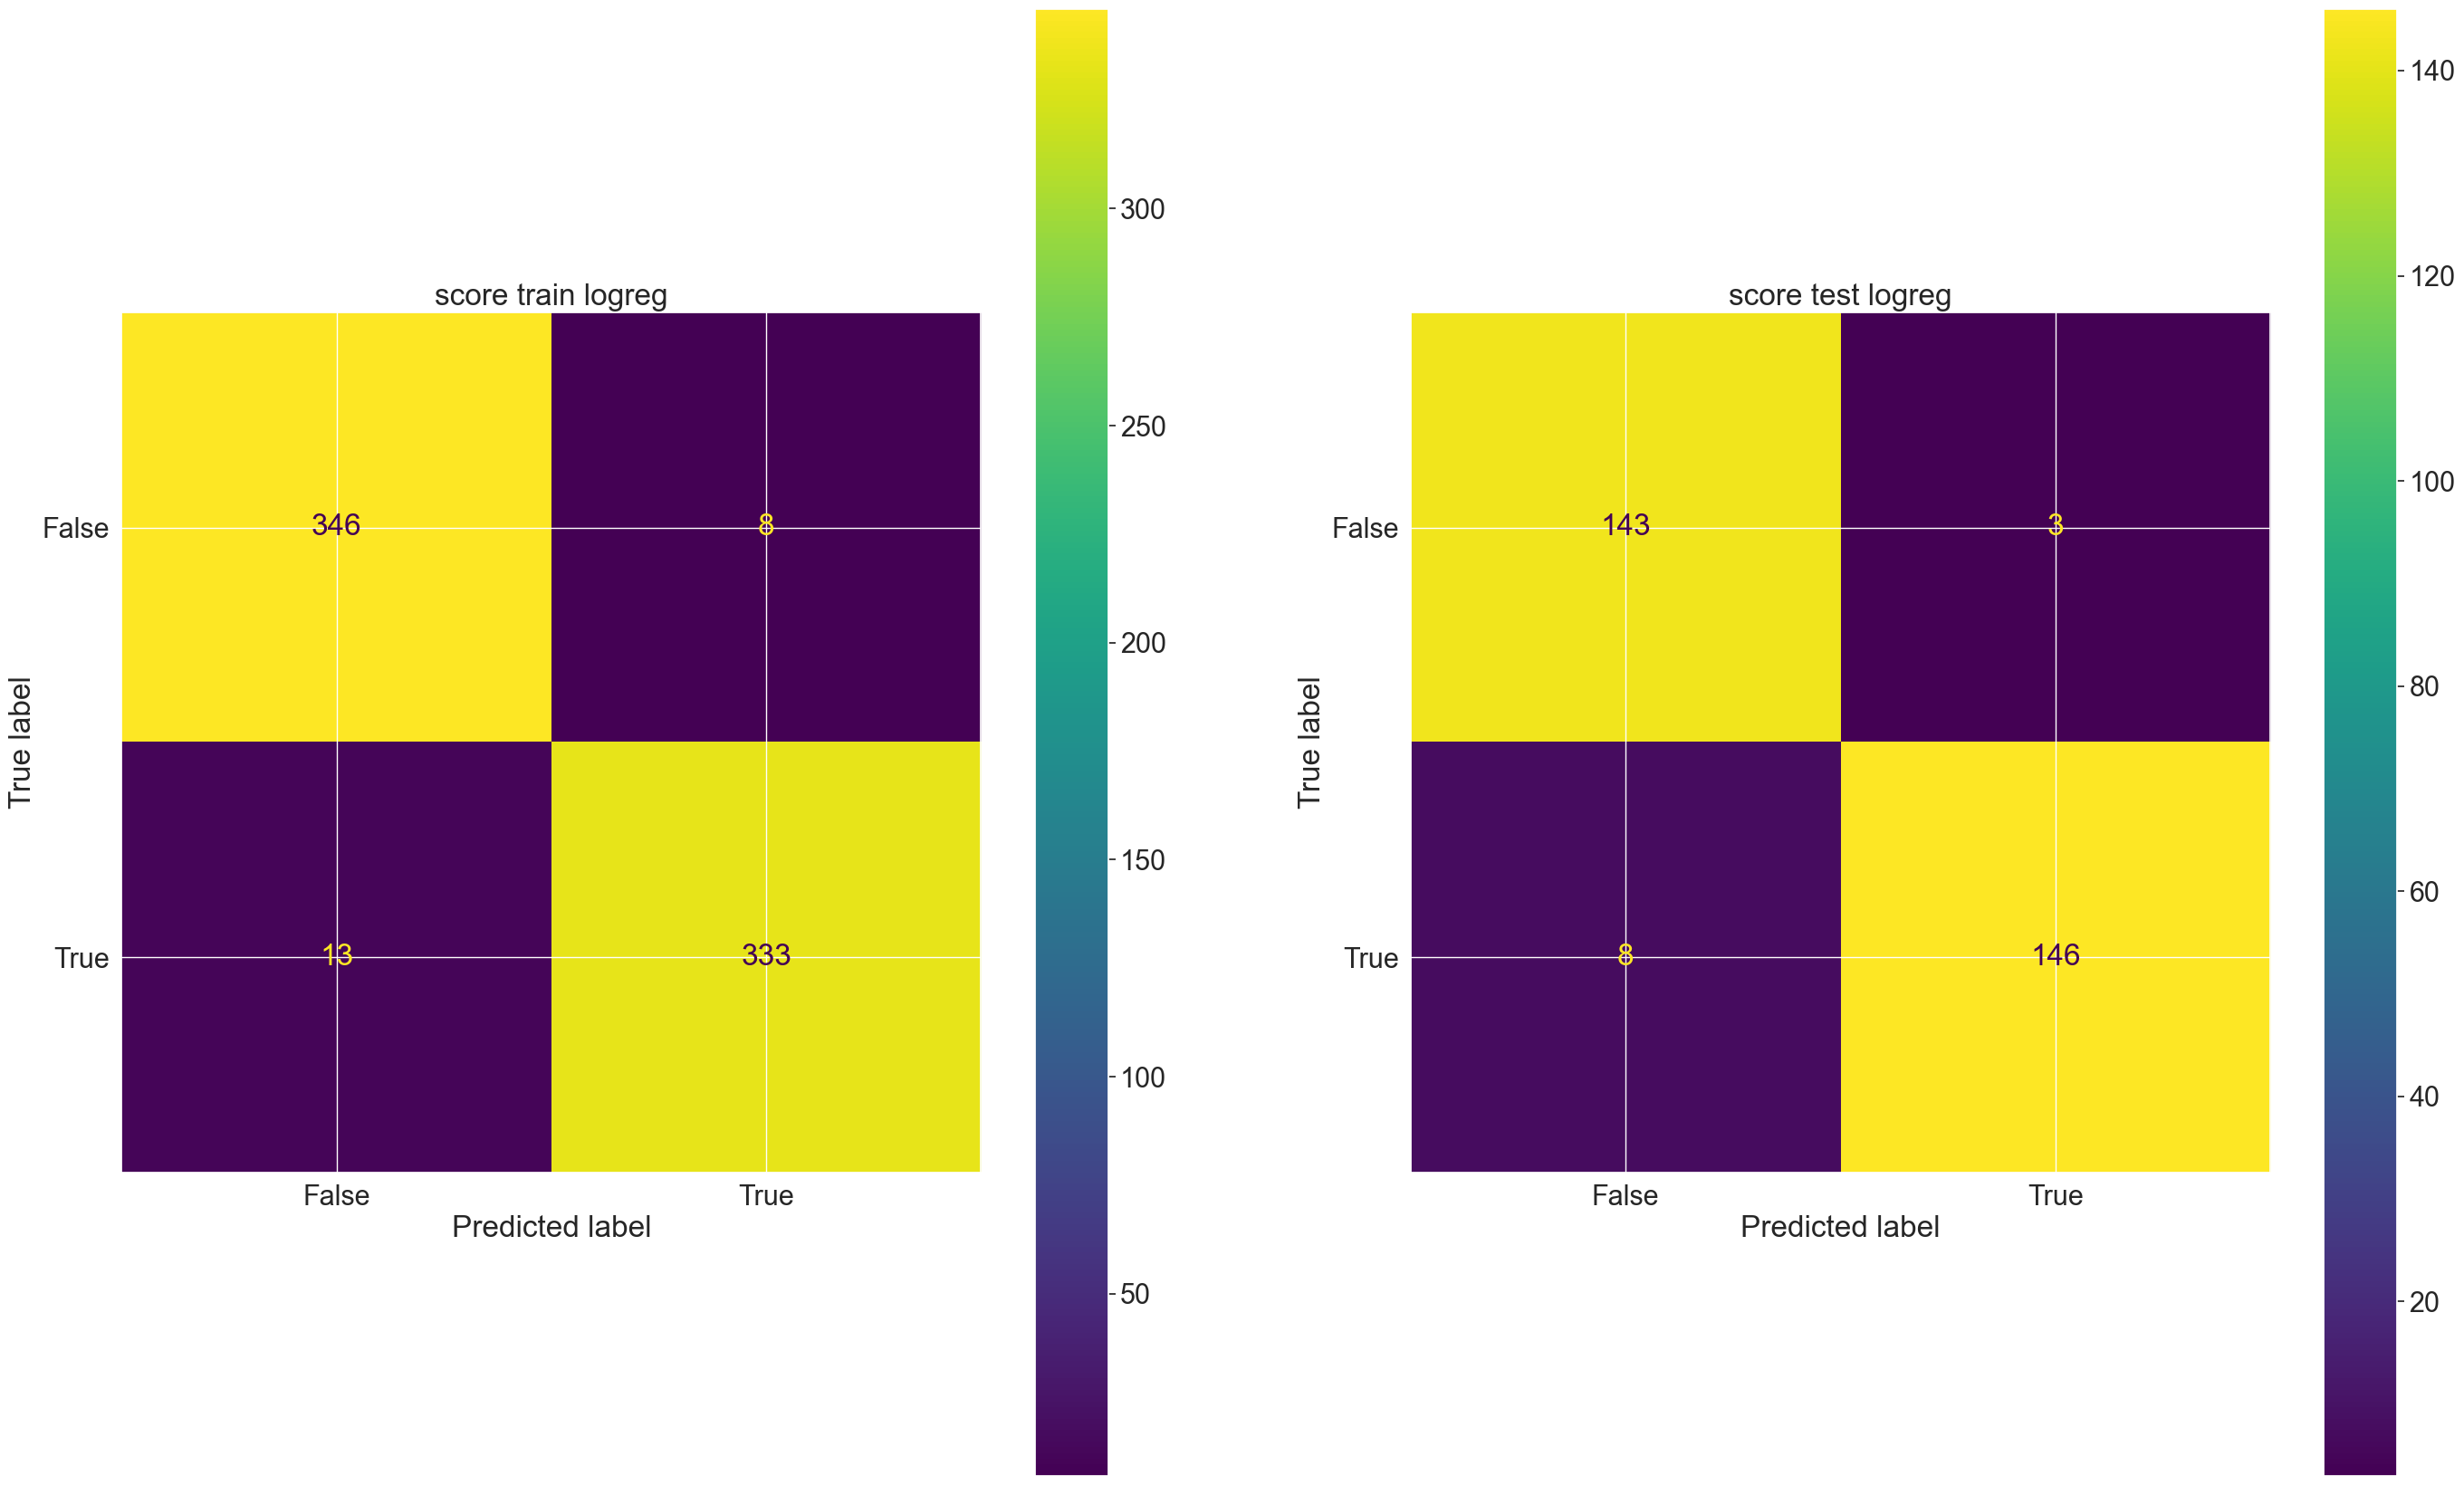

In [23]:
plt.rcParams['figure.figsize'] = (30,20)
sns.set(font_scale=2)
fig, ax = plt.subplots(1,2)
ax[0].set_title("score train logreg")
ax[1].set_title("score test logreg")

# fit model
logreg = LogisticRegression(solver = 'sag' ,penalty =  'l2', max_iter =27, fit_intercept = True, 
                            C = 0.8333333333333333,random_state= 42)
logreg.fit(X_train, y_train)
y_pred_train_logreg = logreg.predict(X_train)
y_pred_test_logreg = logreg.predict(X_test)

print("Score train logreg")
print(metrics.classification_report(y_train,y_pred_train_logreg))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_logreg),
display_labels = [False, True]).plot(ax=ax[0])

print("Score test logreg")
print(metrics.classification_report(y_test,y_pred_test_logreg))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_logreg),
display_labels = [False, True]).plot(ax=ax[1])



In [24]:
tn, fp, fn, tp = confusion_matrix(y_test['clicked_on_ad'].values.tolist(), list(y_pred_test_logreg)).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)


True Positive 146
True Negative 143
False Positive 3
False Negative 8


- It can be seen that the regression model can differentiate predicted cases of clicking on an ad even though they did not click on the ad as many as 143 in the test data (TN), this looks good for saving advertising costs and also does not disturb the experience of users who are not interested.
- there were 8 who were predicted not to click on ads and in fact they actually clicked on ads (FN), this looks good because it can prevent loss of revenue opportunities
- There are 3 users who are predicted to click on ads even though they don't actually want to. This looks good because it can prevent cost loss. (FP)
- There are 146 users who are predicted to click on ads and in fact actually want to click on ads, this looks good because they can get revenue and can provide effective marketing (TP).

## Confusion matrix KNN

Score train KNN
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       354
           1       0.99      0.94      0.96       346

    accuracy                           0.97       700
   macro avg       0.97      0.97      0.97       700
weighted avg       0.97      0.97      0.97       700

Score test KNN
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       146
           1       0.98      0.92      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



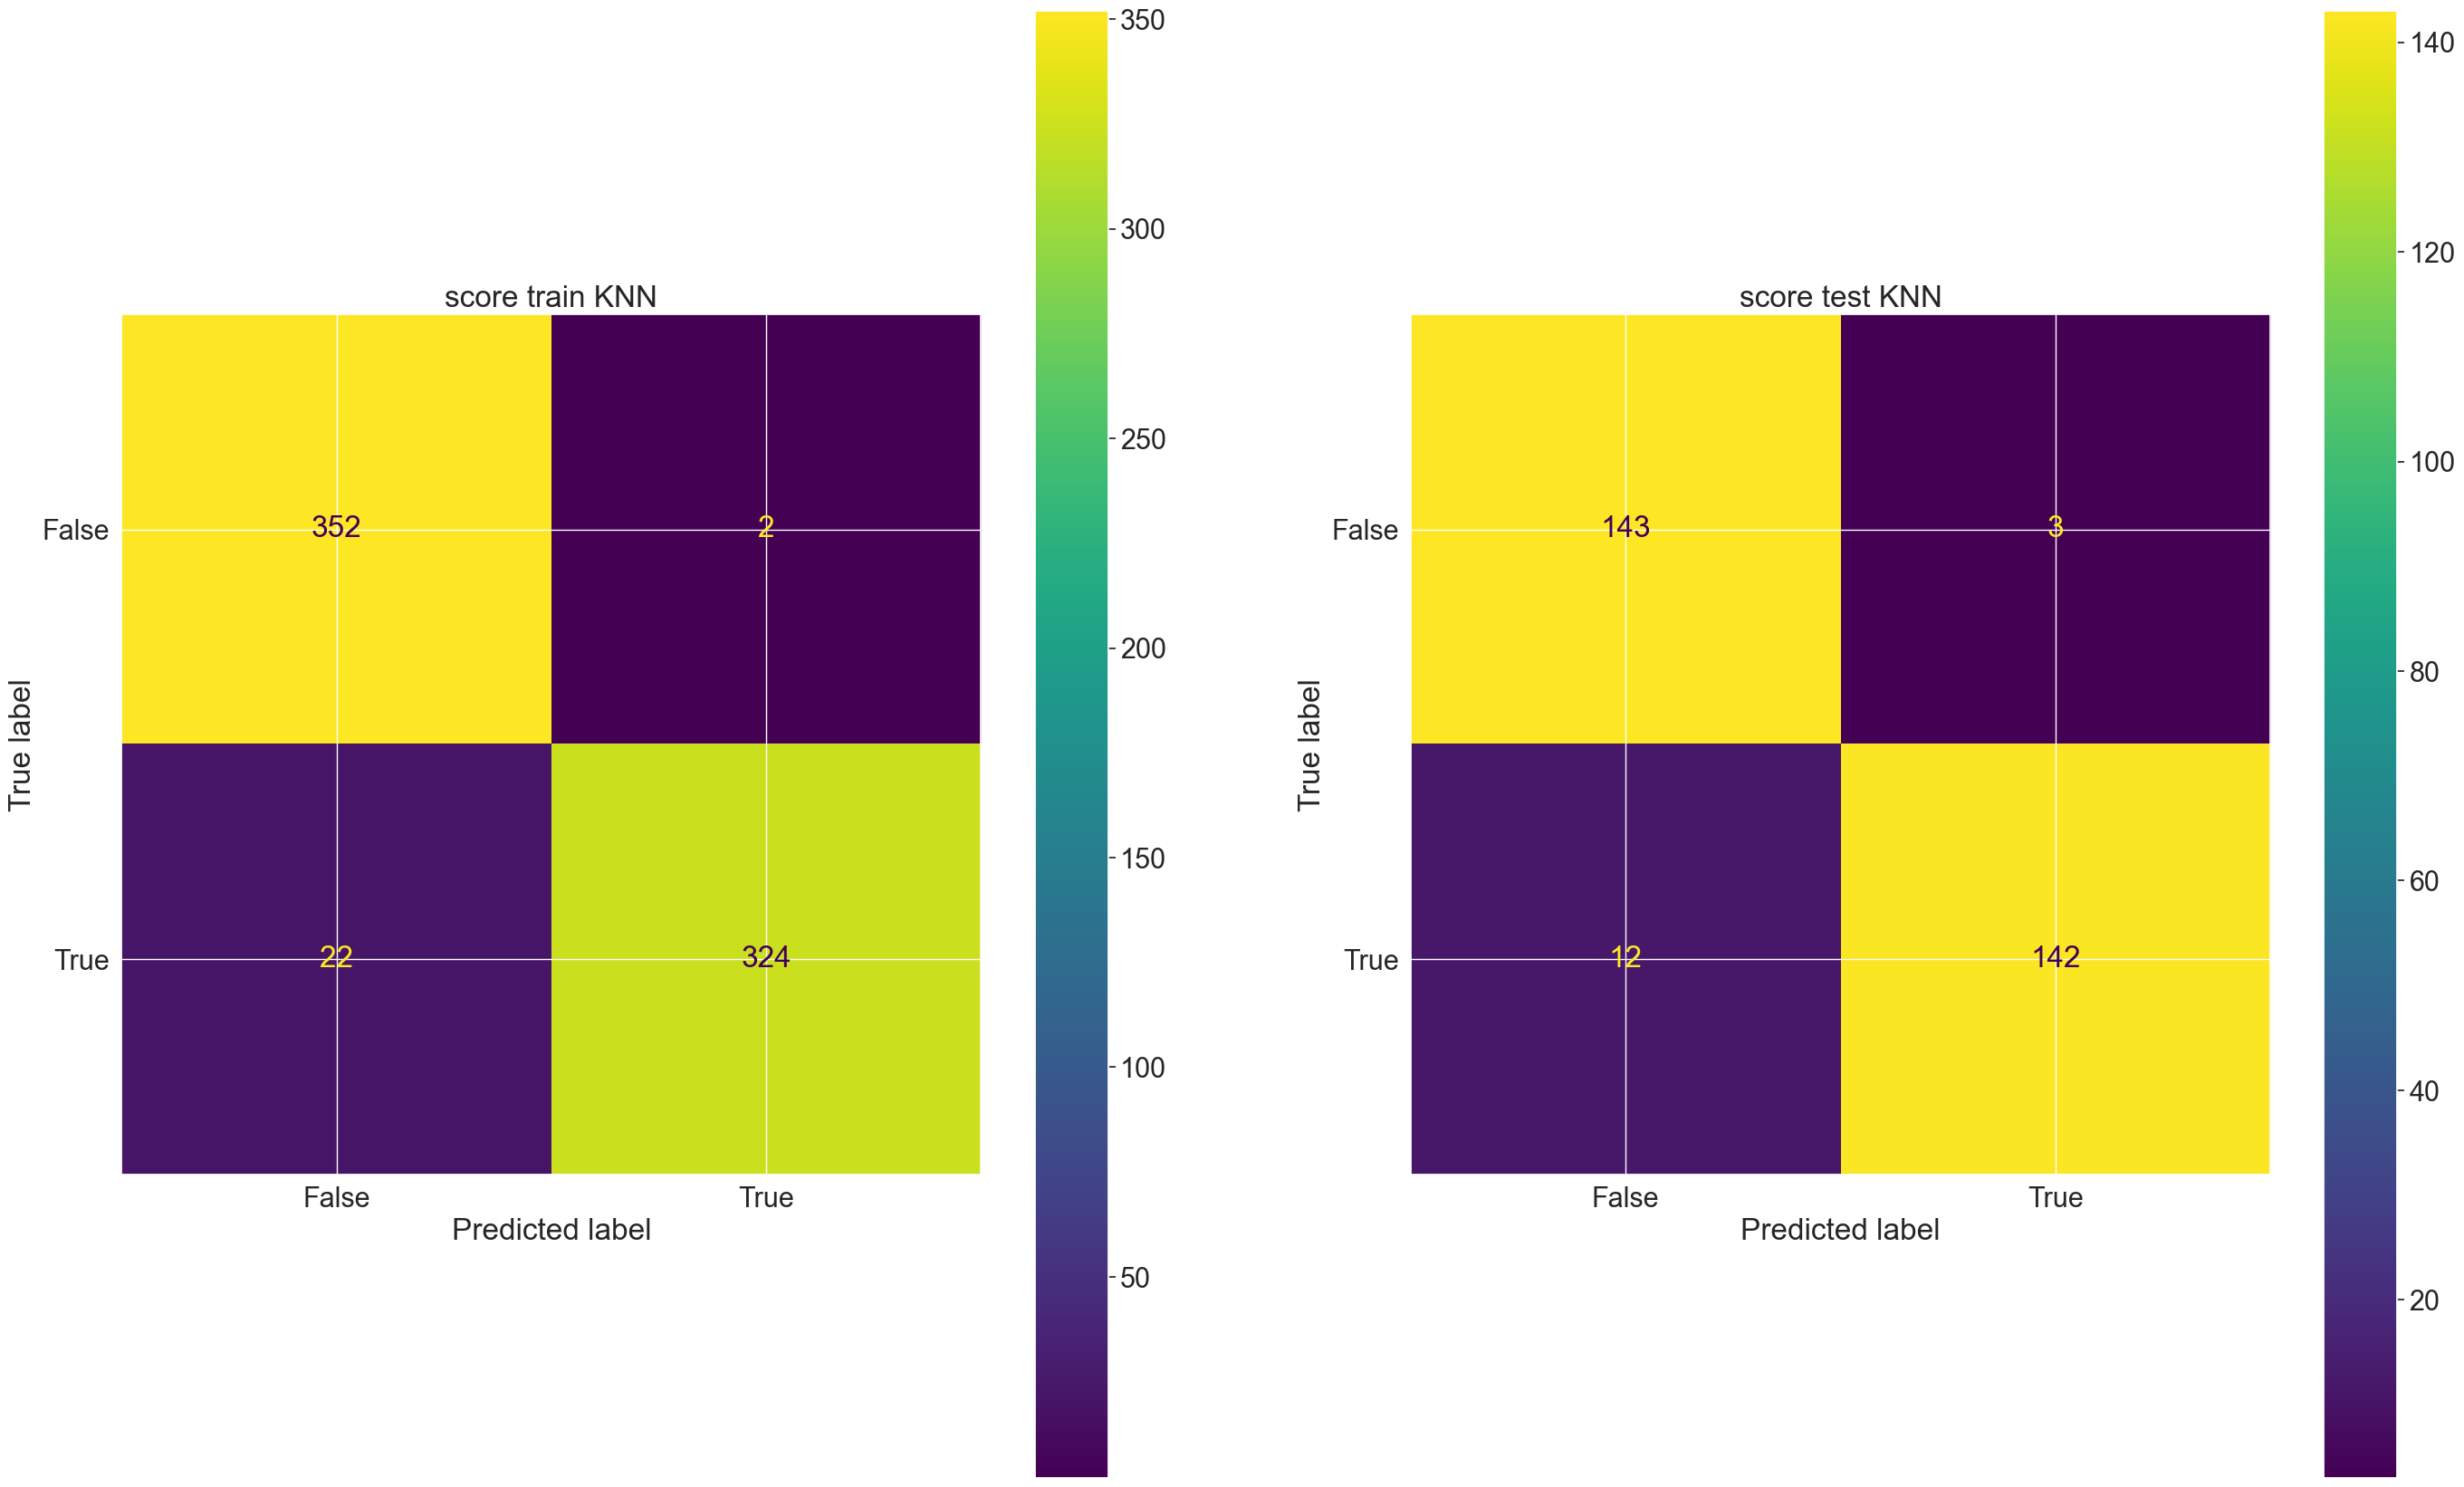

In [112]:
plt.rcParams['figure.figsize'] = (30,20)
sns.set(font_scale=2)
fig, ax = plt.subplots(1,2)
ax[0].set_title("score train KNN")
ax[1].set_title("score test KNN")

# fit model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

print("Score train KNN")
print(metrics.classification_report(y_train,y_pred_train_knn))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_knn),
display_labels = [False, True]).plot(ax=ax[0])

print("Score test KNN")
print(metrics.classification_report(y_test,y_pred_test_knn))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_knn),
display_labels = [False, True]).plot(ax=ax[1])

We can see that both models are pretty good at predicting a case, and that the confusion matrix produced by KNN is not significantly different from that produced by logistic regression. As a result, because knn has large computing costs and is not robust against outliers, we will utilize logistic regression for this dataset, which has the advantage of being robust against outliers and easy to interpretation.

## Learning Curve Logreg

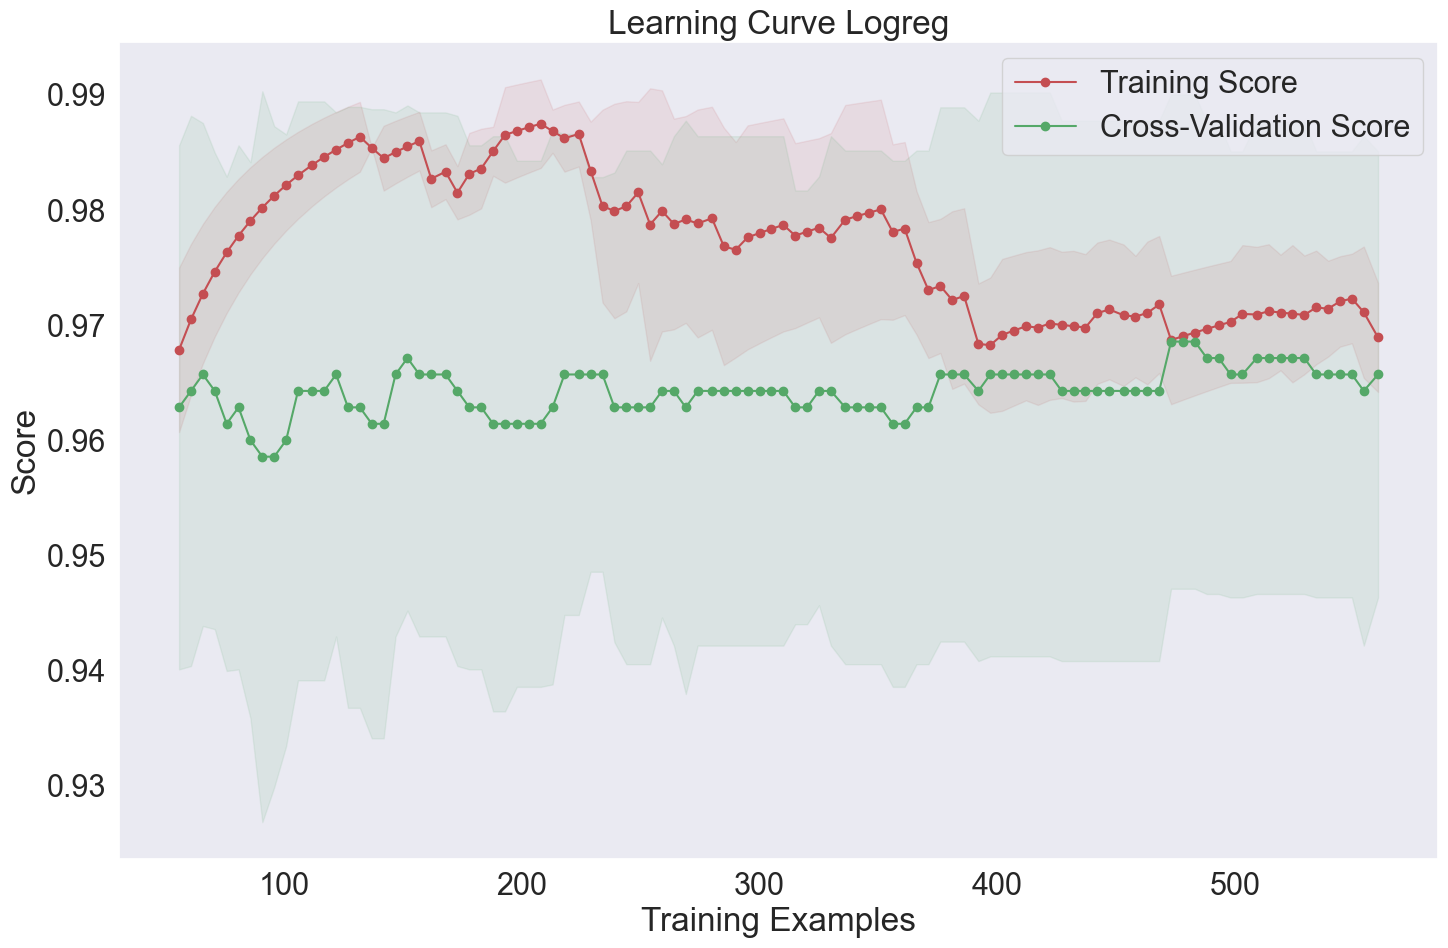

In [25]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(logreg, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 100), cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(15, 10))
plt.title('Learning Curve Logreg')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid(False)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-Validation Score')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The training and cross-validation scores grow as the number of training examples increases in this graph. However, after about 400 training examples, the cross-validation scores began to flatten. This signifies that the model has reached its limits and will not increase accuracy further with further training instances.
Some insights that can be gained:
- This model is great. The training and cross-validation scores are both high, and both improve as the number of training examples increases.
- This model has reached the limits of its capabilities. Its cross-validation scores flat after about 400 training examples.

# Best model

In [40]:
best_models = [['Logistic Regression', LogisticRegression(solver = 'sag', penalty = 'l2', max_iter = 27,fit_intercept = True, C =0.8333333333333333,random_state= 42)]]

In [41]:
# def build machine learning
def eval_classification(best_models):
    model_name = []
    #accuracy
    training_accuracy = []
    cv_accuracy_test = []
    # recall
    cv_recall_test = []
    training_recall = []
    # precision
    cv_precision_test = []
    training_precision = []
    # F1
    cv_f1_test = []
    training_f1 = []
    # ROC AUC
    cv_roc_auc_test = []
    training_roc_auc = []

    for name, model in best_models:
        model.fit(X_train, y_train)
        model_name.append(name)

        #score
        scoring= ['accuracy','recall', 'precision', 'f1', 'roc_auc']

        #CV
        cv_score = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, n_jobs = -1)

        # train
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]



        training_accuracy.append(accuracy_score(y_train,y_pred_train))
        training_recall.append(recall_score(y_train,y_pred_train))
        training_precision.append(precision_score(y_train, y_pred_train))
        training_f1.append(f1_score(y_train, y_pred_train))
        training_roc_auc.append(roc_auc_score(y_train, y_pred_proba_train))


        #test
        cv_accuracy_test.append(abs(cv_score['test_accuracy']).mean())
        cv_recall_test.append(abs(cv_score['test_recall']).mean())
        cv_precision_test.append(abs(cv_score['test_precision']).mean())
        cv_f1_test.append(abs(cv_score['test_f1']).mean())
        cv_roc_auc_test.append(abs(cv_score['test_roc_auc']).mean())

    return pd.DataFrame({
        'Model': model_name,
        'training Accuracy' : training_accuracy,
        'CV Accuracy test' : cv_accuracy_test,
        'Training Recall' : training_recall,
        'CV Recall test': cv_recall_test,
        'Training Precision' : training_precision,
        'CV Precision test' : cv_precision_test,
        'Training F1' : training_f1,
        'CV F1 test' : cv_f1_test,
        'Training AUC_ROC' : training_roc_auc,
        'CV AUC_ROC test' : cv_roc_auc_test,
    })

# Best model

In [56]:
best_model = eval_classification(best_models)
best_model.round(2).style.background_gradient(cmap="Reds")

## Feature Importance

<Figure size 900x600 with 0 Axes>

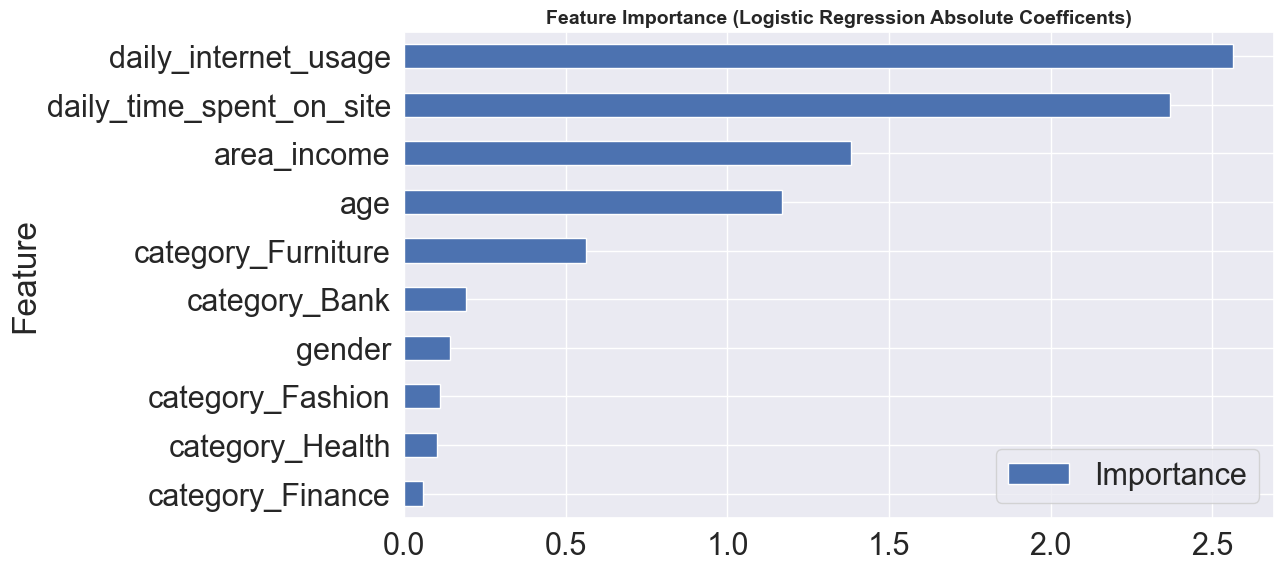

In [57]:
# feature importance
coefficients = logreg.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficients': coefficients, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
plt.figure(figsize=(9,6))
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Feature Importance (Logistic Regression Absolute Coefficents)', fontsize=14, fontweight = 'bold')
plt.show()


daily_internet_usage       -2.563249
daily_time_spent_on_site   -2.370684
area_income                -1.382632
category_Furniture         -0.561990
category_Fashion           -0.110072
category_Health            -0.100926
category_Finance           -0.058321
gender                      0.141412
category_Bank               0.191754
age                         1.170386
dtype: float64




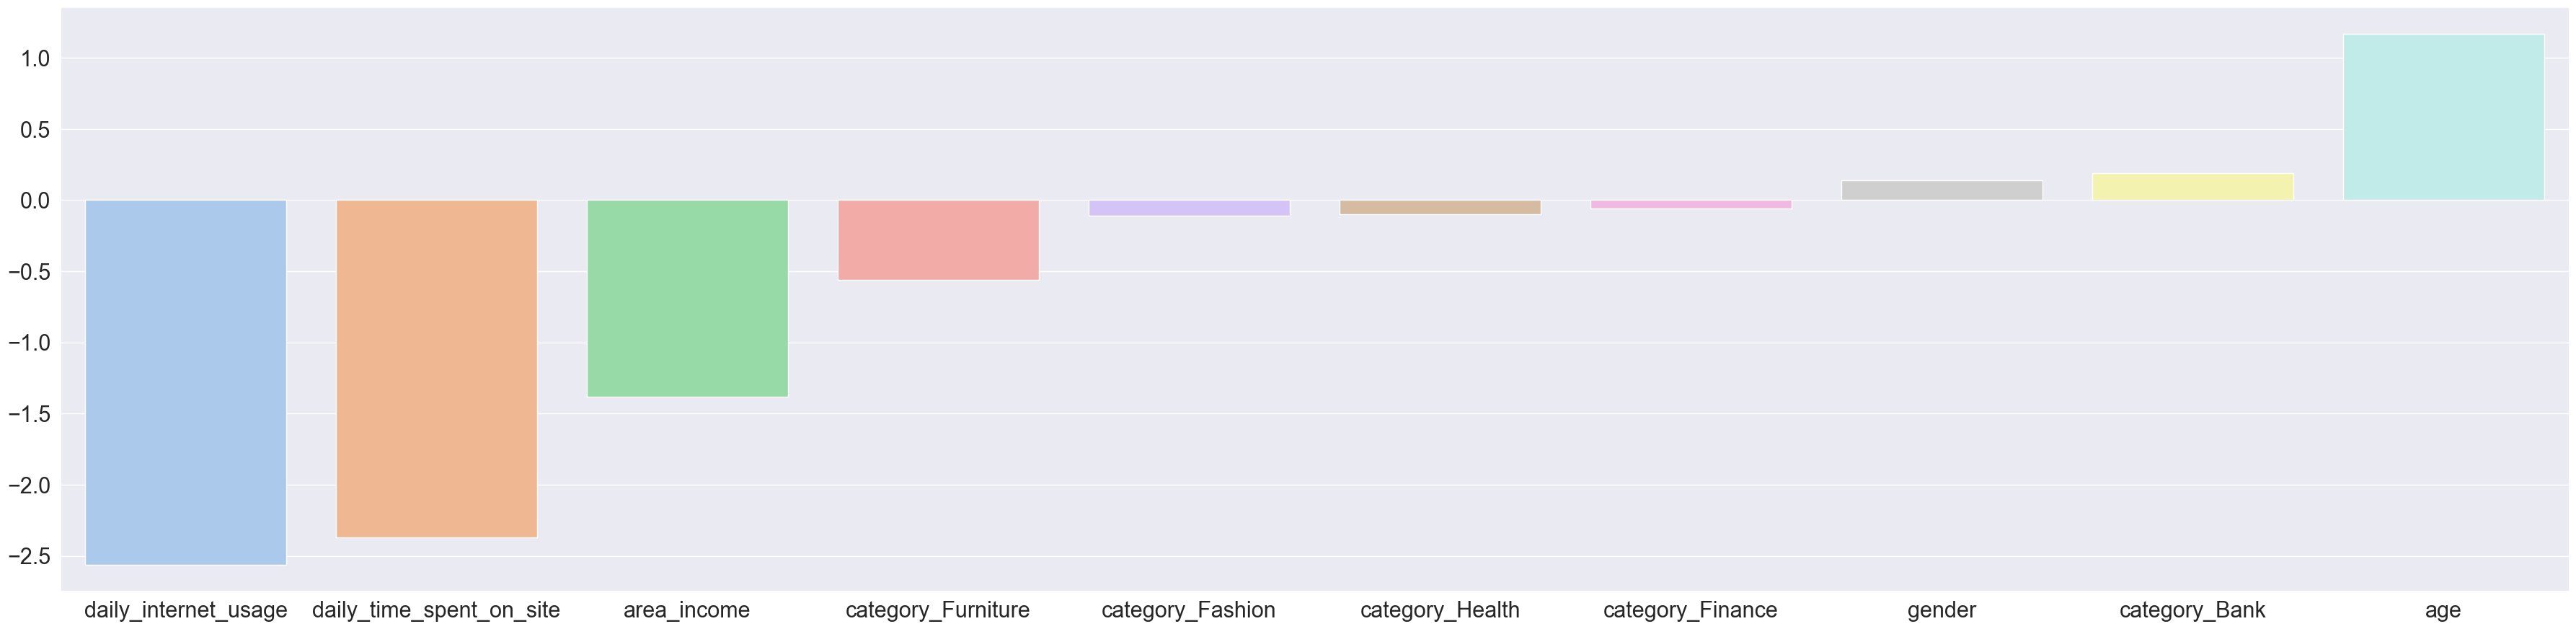

In [58]:
# coef for logistic
coef = pd.Series(data=logreg.coef_[0], index=X.columns)
coef = coef.sort_values()
print(coef)
print('\n')
plt.figure(figsize=(40,10))
sns.barplot(x=coef.index, y=coef.values, palette="pastel")
plt.show()

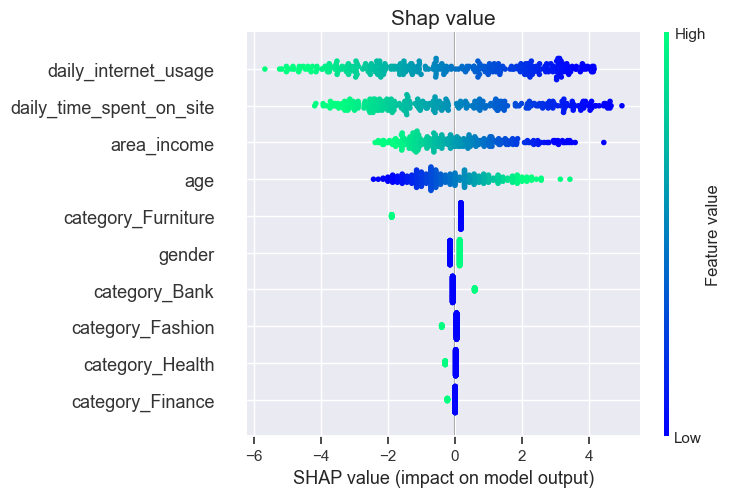

In [85]:
import shap
explainer = shap.Explainer(logreg, X_test, feature_names=X_test.columns)
shap_values = explainer(X_test)

plt.title("Shap value", fontsize= 15)
shap.summary_plot(shap_values, X_test, cmap= 'winter')

## Business insight 
- on the `daily internet usage` feature,It can be seen that this feature has a strong correlation with the target however, based on eda, feature importance, and shape value, the feature has a negative influence, because the more frequently the customer uses the internet, the less likely he is to suppress advertising. Customers, on the other hand, tend to click adverts when they access the internet for a brief period of time. This could be because clients who use the internet heavily tend to be more productive or focused on specific tasks. Because they are focused on their activities, they may be less attentive to commercials, and as a result, there is less potential to click ads.
- in the `daily time spent on site` feature,As can be observed, this feature is similarly substantially connected with the target nevertheless, it has a noticeable detrimental influence on the resulting shap and coef. This feature, if connected to the eda, has something in common with the daily internet usage function, in that if users spend longer time on the website, they are less likely to click on adverts.
- The `area income` feature also appears to have a strong correlation but also has a negative influence, Although a high income frequently comes with greater purchasing capacity, spending habits and priorities also have a role. Some people with high salaries may be inclined to conserve rather than instantly spend their money on promoted goods or services.
- for `age` it also has an indication that it has a strong influence and has a positive influence on modeling, if you look at the eda and shape values, it shows that if the user's age is older, they are more likely to click on the ad. <br>

These four features greatly affect the model that the customer will click on the ad or not. This important feature will be used as a benchmark for business recommendations.

## Business Recomendation 
After doing the modeling, we will then make a business recommendation based on eda, feature importance, shap :

- `Ad placements should be optimized` for active internet users. Ads are less effective with heavy internet users. Consider optimizing ad placement for users with limited internet usage or finding ways to make ads stand out for this demographic, such as through captivating images or unique offers that can raise user curiosity and eventual ad clicks.
- `Area income` Customers with high incomes do not tend to advertise, hence specific segmentation ads are required for all client categories in order to optimize the earnings acquired subsequently.
- `age` It is more dispersed among older individuals who click on ads, so it may be further optimized for material that can cover everything from young to senior, increasing the odds of customers being interested and clicking on the ad.

## Business Simulation 

In [59]:
# count percentage error
result = pd.concat([X_test.reset_index(drop=True),
                    y_test.reset_index(drop=True)], axis=1)
result['y_predict'] = y_pred_test_logreg
result['error'] = np.where(result['clicked_on_ad'] != result['y_predict'], True, False)
result

daily_time_spent_on_site       age  area_income  daily_internet_usage  \
0                   -0.100321 -0.766237    -0.053799             -1.305496   
1                    0.413568  1.971742    -1.059994             -1.256372   
2                   -1.366023  0.305146     0.474837             -0.964392   
3                   -1.468543  1.614614     0.896993              0.116347   
4                    0.893928 -0.766237     0.813767              0.714606   
..                        ...       ...          ...                   ...   
295                  0.049912  1.376529    -2.065384             -1.274361   
296                  1.235661  0.067061     0.971544              0.404868   
297                 -0.276346 -0.766237     0.095780             -1.240458   
298                  0.076348  1.495571    -2.343931             -1.044883   
299                  1.493573  0.305146     0.086535              1.038874   

       gender  category_Bank  category_Fashion  category_Finance  \
0   -1.033908      -0.339473         -0.288154         -0.301511   
1    0.967204      -0.339473         -0.288154         -0.301511   
2   -1.033908       2.945746         -0.288154         -0.301511   
3    0.967204      -0.339473         -0.288154          3.316625   
4    0.967204      -0.339473         -0.288154         -0.301511   
..        ...            ...               ...               ...   
295  0.967204      -0.339473          3.470371         -0.301511   
296  0.967204      -0.339473         -0.288154         -0.301511   
297  0.967204      -0.339473         -0.288154         -0.301511   
298 -1.033908      -0.339473         -0.288154         -0.301511   
299 -1.033908      -0.339473         -0.288154         -0.301511   

     category_Furniture  category_Health  clicked_on_ad  y_predict  error  
0             -0.314485         2.625783              1          1  False  
1             -0.314485        -0.380839              1          1  False  
2             -0.314485        -0.380839              1          1  False  
3             -0.314485        -0.380839              1          1  False  
4             -0.314485        -0.380839              0          0  False  
..                  ...              ...            ...        ...    ...  
295           -0.314485        -0.380839              1          1  False  
296           -0.314485        -0.380839              0          0  False  
297           -0.314485        -0.380839              1          1  False  
298           -0.314485         2.625783              1          1  False  
299            3.179797        -0.380839              0          0  False  

[300 rows x 13 columns]

In [80]:
result[result.error == True]

daily_time_spent_on_site       age  area_income  daily_internet_usage  \
31                   0.708232  0.305146     1.143693             -0.712081   
42                   0.692113 -1.599535    -1.034957             -0.176785   
75                  -0.276346 -1.361450     0.862930             -0.227063   
86                  -0.597446 -1.956663    -1.029692              0.251036   
94                  -0.313098 -0.290067     1.641858              0.474980   
115                  0.307179  0.900359    -2.083365              1.799036   
133                  0.525759 -0.647195     1.205051              0.726829   
148                  0.541234 -0.647195    -0.340046              1.742070   
189                 -0.674820  0.781316     1.629768             -0.300865   
190                 -0.374352 -0.647195     1.499444              0.038855   
220                  0.966789 -1.361450     0.052932              0.041162   

       gender  category_Bank  category_Fashion  category_Finance  \
31  -1.033908      -0.339473         -0.288154         -0.301511   
42   0.967204      -0.339473         -0.288154          3.316625   
75   0.967204      -0.339473         -0.288154         -0.301511   
86   0.967204       2.945746         -0.288154         -0.301511   
94   0.967204      -0.339473         -0.288154         -0.301511   
115  0.967204      -0.339473         -0.288154         -0.301511   
133 -1.033908      -0.339473         -0.288154          3.316625   
148 -1.033908      -0.339473         -0.288154         -0.301511   
189  0.967204      -0.339473         -0.288154         -0.301511   
190 -1.033908      -0.339473         -0.288154         -0.301511   
220 -1.033908      -0.339473         -0.288154          3.316625   

     category_Furniture  category_Health  clicked_on_ad  y_predict  error  
31            -0.314485        -0.380839              0          1   True  
42            -0.314485        -0.380839              1          0   True  
75            -0.314485        -0.380839              1          0   True  
86            -0.314485        -0.380839              0          1   True  
94            -0.314485        -0.380839              1          0   True  
115           -0.314485        -0.380839              1          0   True  
133           -0.314485        -0.380839              1          0   True  
148           -0.314485        -0.380839              1          0   True  
189           -0.314485        -0.380839              0          1   True  
190           -0.314485        -0.380839              1          0   True  
220           -0.314485        -0.380839              1          0   True

In [61]:
error = sum(result.error== True)
total = len(result.error)
error_percentage = (error / total) * 100
print(f"Error Percentage: {error_percentage:.1f}%")

Error Percentage: 3.7%


When compared to the actual data, around 3.7% of the predictions were inaccurate. In other words, around 11 user of the 300 test data were incorrectly predicted by the model. As a result, the model can be considered to be `highly good at classification`.

### without model
in this scheme, simulation is applied in data test with 300 user.<br>
For this simulation, I will use a source from [Signalmagz.com](https://www.sinyalmagz.com/tips-simulasi-menghitung-biaya-digital-marketing/)

In [69]:
ctr1 = round((((y_test['clicked_on_ad']==1).sum())/len(y_test.clicked_on_ad))*100, 1) 
# Total Cost
cost1 = round((len(y_test))* 1000, 2)
# Revenue
revenue1 = round(((y_test['clicked_on_ad']==1).sum())* 5000, 1)
# Profit
profit1 = revenue1 - cost1
print(f'Click Through Rate: {ctr1}%')
print(f'Total cost: Rp.{cost1}')
print(f'Revenue: Rp.{revenue1}')
print(f'Profit: Rp.{profit1}')

Click Through Rate: 51.3%
Total cost: Rp.300000
Revenue: Rp.770000
Profit: Rp.470000


Without machine learning, it was found that the CTR was 51,3% with a total cost of Rp. 300,000, revenue of Rp. 770,000 and the profit earned is Rp. 470,000.

In [63]:
print('Customers who receive adverts without model: ', len(y_test))

Customers who receive adverts without model:  300


## With Model

In [75]:
# Click Through Rate
ctr2 = round(((tp)/(tp+fn))*100, 1) 
# Total Cost
cost2 = round((tp+fn)* 1000, 2)
# Revenue
revenue2 = round((tp+fn)* 5000, 2)
# Profit
profit2 = revenue2 - cost2
print(f'Click Through Rate: {ctr2}%')
print(f'Total cost: Rp.{cost2}')
print(f'Revenue: Rp.{revenue2}')
print(f'Profit: Rp.{profit2}')

Click Through Rate: 94.8%
Total cost: Rp.154000
Revenue: Rp.770000
Profit: Rp.616000


With machine learning it was found that the CTR was 95% with a total cost of Rp. 154,000, revenue of Rp. 770,000 and the profit earned is Rp. 616,000.

## Simulation with business metric

In [76]:
incres_ctr = ctr2 - ctr1 
save_cost = cost1 - cost2  
revenue_total = revenue2 - revenue1
profit_total = profit2 - profit1 
save_cost_percent = round((save_cost/cost1)*100, 1) 
save_revenue_percent = round((revenue_total/revenue1)*100, 1) 
profit_percent = round((profit_total/profit1)*100,1) 
print(f'The percentage increase in CTR is by {incres_ctr}%')
print(f'The percentage of costs reduced as a result of utilizing the models conclusions (Efficiency) is {save_cost_percent}%')
print(f'The revenue percentage of the model final results is {save_revenue_percent}%')
print(f'The profit gain as a percentage of the model final results is {profit_percent}%')


The percentage increase in CTR is by 43.5%
The percentage of costs reduced as a result of utilizing the models conclusions (Efficiency) is 48.7%
The revenue percentage of the model final results is 0.0%
The profit gain as a percentage of the model final results is 31.1%


In [72]:
print('Customers who receive adverts is: ', tp+fn)

Customers who receive adverts is:  154


### conclusion 

- without the CTR model, only 51% can be achieved, but with the CTR model it can reach 95%. This clearly shows a significant increase of around 44%.
- We can only do advertisements to all clients without exception without a model, which may result in potential cost loss, but if we use a model, we can save 49% on costs, which of course looks excellent so that we can maximize the profits we obtain later.
- It can be observed that the revenue obtained with or without the model is the same, but if the expenditures incurred are fewer, the profit will be maximized.
- The model is capable of increasing profit by 31% by making accurate model predictions with an error rate of 3.7%.